# Analysis of Funding Received by Start-ups in India from 2018 to 2021

## 1. Business Understanding

### 1.1 Project Description
This data analysis project focuses on the funding received by start-ups in India from 2018 to 2021. The objective is to gain insights into the Indian start-up ecosystem and propose the best course of action for our team's venture. By analyzing the data on funding amounts, start-up details, and investor information, we aim to unearth prevailing patterns and gain insights about the opportunities in India's start-up ecosystem to inform decision-making.

### 1.2 The type of the problem
This project is of the exploratory data analytics and visualization type as it is our aim to deduce hidden insights and patterns from the available data.



## 2. Data understanding
The data used in this project was sampled from different start-up companies in India. It contains funding history for the period 2018 - 2021. The data was obtained from 4 datasets.

## 3. Data preparation
### 3.1 Installing and importing libraries

In [1]:
%pip install pyodbc  
%pip install python-dotenv 
%pip install fuzzywuzzy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [158]:
import pyodbc
from dotenv import dotenv_values 

# Analysis libraries
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import re
import datetime
from datetime import datetime
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Warning libraries
import warnings
warnings.filterwarnings('ignore')

### 3.2 Loading data

In [159]:
data2018 = pd.read_csv('data/startup_funding2018.csv')
data2018.head()

Company Name                                           Industry  \
0  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
1  Happy Cow Dairy                               Agriculture, Farming   
2       MyLoanCare   Credit, Financial Services, Lending, Marketplace   
3      PayMe India                        Financial Services, FinTech   
4         Eunimart                 E-Commerce Platforms, Retail, SaaS   

  Round/Series       Amount                          Location  \
0         Seed       250000       Bangalore, Karnataka, India   
1         Seed  ₹40,000,000        Mumbai, Maharashtra, India   
2     Series A  ₹65,000,000           Gurgaon, Haryana, India   
3        Angel      2000000       Noida, Uttar Pradesh, India   
4         Seed            —  Hyderabad, Andhra Pradesh, India   

                                       About Company  
0  TheCollegeFever is a hub for fun, fiesta and f...  
1  A startup which aggregates milk from dairy far...  
2          Leading Online Loans Marketplace in India  
3  PayMe India is an innovative FinTech organizat...  
4  Eunimart is a one stop solution for merchants ...

In [160]:
data2019 = pd.read_csv('data/startup_funding2019.csv')
data2019.head()

Company/Brand  Founded HeadQuarter           Sector  \
0  Bombay Shaving      NaN         NaN        Ecommerce   
1       Ruangguru   2014.0      Mumbai           Edtech   
2        Eduisfun      NaN      Mumbai           Edtech   
3        HomeLane   2014.0     Chennai  Interior design   
4        Nu Genes   2004.0   Telangana         AgriTech   

                                        What it does  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor     Amount($)  \
0                               Sixth Sense Ventures    $6,300,000   
1                                   General Atlantic  $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey   $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...   $30,000,000   
4           Innovation in Food and Agriculture (IFA)    $6,000,000   

           Stage  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

In [161]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")


connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [162]:
# Use the connect method of the pyodbc library and pass in the connection string.
# This will connect to the server and might take a few seconds to be complete. 
# Check your internet connection if it takes more time than necessary

connection = pyodbc.connect(connection_string)

In [163]:
# Now the sql query to get the data is what what you see below. 
# Note that you will not have permissions to insert delete or update this database table. 

query = "Select * from dbo.LP1_startup_funding2020"
data2020 = pd.read_sql(query, connection)

In [164]:
data2020.head()

Company_Brand  Founded HeadQuarter              Sector  \
0    Aqgromalin   2019.0     Chennai            AgriTech   
1      Krayonnz   2019.0   Bangalore              EdTech   
2  PadCare Labs   2018.0        Pune  Hygiene management   
3         NCOME   2020.0   New Delhi              Escrow   
4    Gramophone   2016.0      Indore            AgriTech   

                                        What_it_does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3                                      Ritesh Tiwari   
4  Ashish Rajan Singh, Harshit Gupta, Nishant Mah...   

                              Investor   Amount     Stage column10  
0                      Angel investors 200000.0      None     None  
1                      GSF Accelerator 100000.0  Pre-seed     None  
2                       Venture Center      NaN  Pre-seed     None  
3  Venture Catalysts, PointOne Capital 400000.0      None     None  
4  Siana Capital Management, Info Edge 340000.0      None     None

In [165]:
query = "Select * from dbo.LP1_startup_funding2021"
data2021 = pd.read_sql(query, connection)

In [166]:
data2021.head()

Company_Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics   2019.0   Bangalore      AI startup   
1          upGrad   2015.0      Mumbai          EdTech   
2     Lead School   2012.0      Mumbai          EdTech   
3         Bizongo   2015.0      Mumbai  B2B E-commerce   
4        FypMoney   2021.0    Gurugram         FinTech   

                                        What_it_does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor        Amount         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000          None  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed

### To guide our analysis, we have formulated 5 SMART questions:
* What is the overall trend in funding received by start-ups in India from 2018 to 2021?
* Which industries or sectors have received the highest funding during this period?
* What is the distribution of startups across the cities in India?
* What is the average funding amount received by start-ups in India during this period?
* Is there a correlation between the funding amount and the number of investors involved in funding rounds?

###  We have also developed three hypotheses for testing:
Hypothesis 1:<br>
Null: The funding received by start-ups in India has not demonstrated consistent upward trajectory over the years.<br>
Alternate: The funding received by start-ups in India has demonstrated a consistent upward trajectory over the years.

Hypothesis 2: <br>
Null: There are no significant disparities in funding received by all sectors of the Indian startups. <br>
Alternate: The technology sectors receive higher funding compared to other industries.

Hypothesis 3: <br>
Null: Situating a startup in a particular city does not influence funding.<br>
Alternate: Situating a startup in a particular city significantly affects funding.

To test these hypotheses, we will conduct the following analyses: 
* For Hypothesis 1, we will analyze the year-by-year funding amounts and calculate the average growth rate of funding.
* To investigate Hypothesis 2, we will categorize start-ups based on industry and compare the funding amounts received by each sector.
* Regarding Hypothesis 3, we will examine the distribution of start-ups across cities and deduce which cities harbour most highly-funded start-ups.

## 3.2 Data Cleaning


### 3.2.1 2018 Data

First, the 2018 data will be cleaned.

In [167]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [168]:
#defining a function that returns counts of unique values
def value(column):
    return data2018[column].value_counts()


value("Company Name")

TheCollegeFever                                                  2
NIRAMAI Health Analytix                                          1
Drivezy                                                          1
Hush - Speak Up. Make Work Better                                1
The Souled Store                                                 1
Perspectico                                                      1
Kogta Financial India Limited                                    1
Hospals                                                          1
UrbanClap                                                        1
Square Off                                                       1
Gaia Smart Cities                                                1
ERUDITUS Executive Education                                     1
Career Anna                                                      1
Wicked Ride Adventure Services Private Limited                   1
Cricnwin                                                      

In [169]:
value("Industry")

—                                                                                                                                           30
Financial Services                                                                                                                          15
Education                                                                                                                                    8
Information Technology                                                                                                                       7
Health Care, Hospital                                                                                                                        5
Finance, Financial Services                                                                                                                  5
Fitness, Health Care, Wellness                                                                                                               4

In [170]:
value("Round/Series")

Seed                                                                                                       280
Series A                                                                                                    73
Angel                                                                                                       37
Venture - Series Unknown                                                                                    37
Series B                                                                                                    20
Series C                                                                                                    16
Debt Financing                                                                                              13
Private Equity                                                                                              10
Corporate Round                                                                                              8
P

In [171]:
value("Location")

Bangalore, Karnataka, India         102
Mumbai, Maharashtra, India           94
Bengaluru, Karnataka, India          55
Gurgaon, Haryana, India              52
New Delhi, Delhi, India              51
Pune, Maharashtra, India             20
Chennai, Tamil Nadu, India           19
Hyderabad, Andhra Pradesh, India     18
Delhi, Delhi, India                  16
Noida, Uttar Pradesh, India          15
Haryana, Haryana, India              11
Jaipur, Rajasthan, India              9
Ahmedabad, Gujarat, India             6
Kolkata, West Bengal, India           6
Bangalore City, Karnataka, India      5
Indore, Madhya Pradesh, India         4
India, Asia                           4
Kormangala, Karnataka, India          3
Ghaziabad, Uttar Pradesh, India       2
Kochi, Kerala, India                  2
Bhopal, Madhya Pradesh, India         2
Thane, Maharashtra, India             2
Jodhpur, Rajasthan, India             1
Powai, Assam, India                   1
Andheri, Maharashtra, India           1


In [172]:
value("About Company")

TheCollegeFever is a hub for fun, fiesta and frolic of Colleges.                                                                                2
Algorithmic trading platform.                                                                                                                   2
Finwego partners with Small and Medium Businesses in India to offer convenient and responsible credit to their employees                        1
Drivezy is India's largest vehicle sharing platform which helps people turn their vehicles into earning members of their family.                1
Enabling diversity of opinions in organizations                                                                                                 1
The Souled Store bring to you awesome t-shirts, framed prints, badges, notebooks, coasters.                                                     1
An Education Management startup.                                                                                            

 #### Dealing with duplicates

In [173]:
#checking for duplicates
data2018.duplicated().value_counts()

False    525
True       1
dtype: int64

Our 2018 data contains one duplicate which is marked by 'True' value.

In [174]:
#print out all the duplicates next to each other
data2018[data2018.duplicated(keep=False)]

Company Name                                           Industry  \
0    TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   
348  TheCollegeFever  Brand Marketing, Event Promotion, Marketing, S...   

    Round/Series  Amount                     Location  \
0           Seed  250000  Bangalore, Karnataka, India   
348         Seed  250000  Bangalore, Karnataka, India   

                                         About Company  
0    TheCollegeFever is a hub for fun, fiesta and f...  
348  TheCollegeFever is a hub for fun, fiesta and f...

In [175]:
#dropping all duplicates
data2018=data2018.drop_duplicates()

In [176]:
#RECHECK IF THERE ANY DUPLICATES LEFT
data2018.duplicated().value_counts()

False    525
dtype: int64

#### Data type conversion

In [177]:
data2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   525 non-null    object
 1   Industry       525 non-null    object
 2   Round/Series   525 non-null    object
 3   Amount         525 non-null    object
 4   Location       525 non-null    object
 5   About Company  525 non-null    object
dtypes: object(6)
memory usage: 28.7+ KB


In [178]:
value("Amount")

—                  148
1000000             24
500000              13
2000000             12
₹50,000,000          9
₹20,000,000          8
4000000              7
5000000              7
₹40,000,000          6
250000               5
₹35,000,000          5
$100,000             4
300000               4
1500000              4
₹30,000,000          4
3000000              4
1100000              4
₹250,000,000         3
₹600,000,000         3
₹2,000,000,000       3
120000               3
30000000             3
$1,000,000           3
200000               3
₹70,000,000          3
400000               3
$1,500,000           3
₹100,000,000         3
₹10,000,000          3
$100,000,000         3
150000               3
₹5,000,000           3
1300000              3
$11,000,000          3
$2,000,000           3
₹140,000,000         3
$10,000,000          2
$900,000             2
₹650,000,000         2
$50,000,000          2
$5,000,000           2
15000000             2
$6,000,000           2
₹1,200,000 

The ```Amount``` column is categorised as a string data type yet amount should be in integer. This is brought about by several problems in this column:
* The ```,``` ,```$``` ,```₹``` characters which should be removed.
* Also there are ```_``` characters which indicate null values.
* Some currencies are Indian rupees while others US Dollars , so for standard currency the Indian rupee will be converted to US Dollar.
* Finally, the ```Amount``` column will be converted to numeric data type.

In [179]:
#Removing ',' from the Amount column
data2018['Amount'].replace(',','', regex=True, inplace=True)
data2018['Amount']

0            250000
1         ₹40000000
2         ₹65000000
3           2000000
4                 —
5           1600000
6         ₹16000000
7         ₹50000000
8                 —
9                 —
10                —
11                —
12                —
13                —
14                —
15       ₹100000000
16           150000
17          1100000
18                —
19          ₹500000
20          6000000
21           650000
22        ₹35000000
23        ₹64000000
24                —
25                —
26          2000000
27          2000000
28          2000000
29                —
30        ₹20000000
31          1000000
32                —
33           650000
34          1000000
35          5000000
36          4000000
37        ₹30000000
38          1000000
39          2800000
40                —
41           150000
42        ₹40000000
43          1000000
44          1700000
45                —
46          1300000
47          2000000
48                —
49         ₹5000000


In [180]:
#Function to convert Indian rupee currency to dollars
def convert_to_dollars(value):

    if '₹' in str(value):

        amount = value.replace('₹', '')

        return pd.to_numeric(amount, errors='coerce') * 0.146

    elif '$' in str(value):

        return value.replace('$', '')

    elif "—" in str(value):

        return None  # or any other suitable value to represent missing/invalid data

    else:

        return value


pd.set_option('display.float_format', '{:.1f}'.format)

data2018 = data2018.applymap(convert_to_dollars)


    
        

In [181]:
#Converting the column to a numeric data type
data2018["Amount"]=data2018["Amount"].astype(float)
data2018["Amount"].dtype

dtype('float64')

In [182]:
data2018["Amount"]

0         250000.0
1        5840000.0
2        9490000.0
3        2000000.0
4              NaN
5        1600000.0
6        2336000.0
7        7300000.0
8              NaN
9              NaN
10             NaN
11             NaN
12             NaN
13             NaN
14             NaN
15      14600000.0
16        150000.0
17       1100000.0
18             NaN
19         73000.0
20       6000000.0
21        650000.0
22       5110000.0
23       9344000.0
24             NaN
25             NaN
26       2000000.0
27       2000000.0
28       2000000.0
29             NaN
30       2920000.0
31       1000000.0
32             NaN
33        650000.0
34       1000000.0
35       5000000.0
36       4000000.0
37       4380000.0
38       1000000.0
39       2800000.0
40             NaN
41        150000.0
42       5840000.0
43       1000000.0
44       1700000.0
45             NaN
46       1300000.0
47       2000000.0
48             NaN
49        730000.0
50       2920000.0
51       5840000.0
52       292

#### Data Uniformity
For data uniformity across the 4 datasets which will later make merging easier, ```Location``` and ```Industry``` columns will only remain with the first word.

In [183]:
#maintianing first word before comma in the location column
data2018["Location"] = data2018["Location"].map(lambda x: x.split(',')[0])
data2018["Location"]

0           Bangalore
1              Mumbai
2             Gurgaon
3               Noida
4           Hyderabad
5           Bengaluru
6             Kalkaji
7           Hyderabad
8              Mumbai
9           Bangalore
10              Delhi
11          Bengaluru
12              India
13              Hubli
14          Bangalore
15          Bengaluru
16             Mumbai
17          Bengaluru
18          New Delhi
19            Chennai
20             Mumbai
21             Mumbai
22          New Delhi
23              Delhi
24          Bengaluru
25             Mohali
26            Chennai
27             Mumbai
28             Mumbai
29          Hyderabad
30          New Delhi
31            Kolkata
32          Bangalore
33          Bengaluru
34             Mumbai
35          Bengaluru
36             Mumbai
37          New Delhi
38             Mumbai
39            Chennai
40          New Delhi
41          Hyderabad
42              India
43             Mumbai
44          New Delhi
45        

In [184]:
#maintianing first word before comma in the industry column
data2018["Industry"] = data2018["Industry"].map(lambda x: str(x).split(',')[0])
data2018["Industry"]

0                         Brand Marketing
1                             Agriculture
2                                  Credit
3                      Financial Services
4                    E-Commerce Platforms
5                    Cloud Infrastructure
6                                Internet
7                         Market Research
8                    Information Services
9                         Mobile Payments
10                                    B2B
11                               Internet
12                                   Apps
13                          Food Delivery
14                  Industrial Automation
15                             Automotive
16                                Finance
17                             Accounting
18                Artificial Intelligence
19                     Internet of Things
20                     Air Transportation
21                     Financial Services
22                      Food and Beverage
23                    Autonomous V

Earlier, it was noticed that the ```Industry``` column had '-' characters which indicate the values are missing. So the missing values are going to be replaced with ```Unknown ``` value given the column is a categorical data type.

In [185]:
#Replacing '_' with Unknown values
data2018["Industry"]=data2018["Industry"].replace('—', "Unknown", regex=True)
data2018["Industry"]

0                         Brand Marketing
1                             Agriculture
2                                  Credit
3                      Financial Services
4                    E-Commerce Platforms
5                    Cloud Infrastructure
6                                Internet
7                         Market Research
8                    Information Services
9                         Mobile Payments
10                                    B2B
11                               Internet
12                                   Apps
13                          Food Delivery
14                  Industrial Automation
15                             Automotive
16                                Finance
17                             Accounting
18                Artificial Intelligence
19                     Internet of Things
20                     Air Transportation
21                     Financial Services
22                      Food and Beverage
23                    Autonomous V

####  Handling Missing values

In [186]:
#Checking for missing values 
data2018.isnull().sum()

Company Name       0
Industry           0
Round/Series       0
Amount           148
Location           0
About Company      0
dtype: int64

In [187]:
#Computing summary of statistics for 2018 data
data2018.describe()

Amount
count        377.0
mean    47244478.4
std    212692748.2
min         7500.0
25%      1000000.0
50%      3530000.0
75%     14965000.0
max   2920000000.0

The ```Amount``` column contains several missing values. Given the column is numerical, the best strategy would be to replace the missing values with the median  as it is less sensitive to outliers than the mean.

In [188]:
#Imputing missing values
array= data2018["Amount"].values.reshape(-1,1)
imputer=SimpleImputer(strategy="median")

data2018["Amount"]=imputer.fit_transform(array)

In [189]:
#Confirming there are no more missing values
data2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

Inorder to make merging and analysis after merging easier, a column named ```Year Funded ``` which contains the respective years for the dataset will be formed.

In [190]:
data2018= data2018.assign(YearFunded=2018)
data2018.head()

Company Name              Industry Round/Series    Amount   Location  \
0  TheCollegeFever       Brand Marketing         Seed  250000.0  Bangalore   
1  Happy Cow Dairy           Agriculture         Seed 5840000.0     Mumbai   
2       MyLoanCare                Credit     Series A 9490000.0    Gurgaon   
3      PayMe India    Financial Services        Angel 2000000.0      Noida   
4         Eunimart  E-Commerce Platforms         Seed 3530000.0  Hyderabad   

                                       About Company  YearFunded  
0  TheCollegeFever is a hub for fun, fiesta and f...        2018  
1  A startup which aggregates milk from dairy far...        2018  
2          Leading Online Loans Marketplace in India        2018  
3  PayMe India is an innovative FinTech organizat...        2018  
4  Eunimart is a one stop solution for merchants ...        2018

### 3.3.2 2019 Data

#### Data Loading

For loading data files into appropriate variables.

In [191]:
# Loading the data file (ex: csv) using pandas
data_2019 = pd.read_csv('data/startup_funding2019.csv')

#### Data Exploration

Section for **exploratory analysis** on the available data. 

The exploration techniques vary for numerical, categorical, or time-series variables. Currently, 

Here we typically:

- look at example records in the dataset
- investigate the datatypes of variables in the dataset
- calculate and investigate descriptive statistics (ex: central tendencies, variability etc.)

Common steps to check the health of the data:

- Check for missing data
- Check the skewness of the data, outlier detection
- etc...

Look at Example Records

In [192]:
 # display 10 random rows from the dataset 
data_2019.sample(10)

Company/Brand  Founded HeadQuarter        Sector  \
6               Finly      NaN   Bangalore          SaaS   
76             Phable   2018.0         NaN    Healthtech   
45             Afinoz      NaN       Noida       Fintech   
69         Nivesh.com   2016.0       Noida  Mutual Funds   
44         MyGameMate      NaN   Bangalore      E-Sports   
87             Spinny   2015.0       Delhi    Automobile   
5            FlytBase      NaN        Pune    Technology   
49  Awign Enterprises   2016.0   Bangalore           NaN   
48               Box8   2011.0      Mumbai      Foodtech   
53             eJOHRI   2015.0      Mumbai     Jewellery   

                                         What it does  \
6   It builds software products that makes work si...   
76  It creates an engagement loop between doctors,...   
45  Online financial marketplace for customized ra...   
69  The platform simplifies the process of investment   
44  eSports platform where players can access vari...   
87                                Online car retailer   
5                         A drone automation platform   
49               It supplies workforce to the economy   
48                       Enables to order food online   
53     Omnichannel marketplace for gems and jewellery   

                                             Founders  \
6                           Vivek AG, Veekshith C Rai   
76                                        Sumit Sinha   
45                                      Rachna Suneja   
69                    Anurag Garg, Sridhar Srinivasan   
44                       Parshavv Jain& Raju Kushwaha   
87  Niraj Singh, Ramanshu Mahaur, Ganesh Pawar, Mo...   
5                                         Nitin Gupta   
49       Annanya Sarthak, Gurpreet Singh, Praveen Sah   
48                             Amit Raj, Anshul Gupta   
53                       Jignesh Mehta, Shailen Mehta   

                                             Investor     Amount($)  \
6   Social Capital, AngelList India, Gemba Capital...   Undisclosed   
76  LetsVenture, 91 Springboard, IKP Knowledge, An...      $220,000   
45                             Fintech innovation lab   Undisclosed   
69                                   Windrose Capital      $600,000   
44                               Jindagi Live Angels,      $100,000   
87  Norwest Venture Partners, General Catalyst, Fu...   $50,000,000   
5                                         Undisclosed   Undisclosed   
49  Work10M, Michael and Susan Dell Foundation, Ea...    $4,000,000   
48                                   Trifecta Capital  $120,000,000   
53                                     Rajesh Ranavat    $1,000,000   

           Stage  
6            NaN  
76           NaN  
45           NaN  
69           NaN  
44           NaN  
87           NaN  
5            NaN  
49      Series A  
48           NaN  
53  Pre series A

#### Data-types, completeness Information

Using the Pandas "info" function, in addition to the data-type information for the dataset, we can look at counts of available records/missing records too.

In [193]:
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


comprehensive summary of missing data in the dataset
This approach allows you to easily identify columns with a high percentage of missing values, which may require further investigation or imputation strategies.

In [194]:
# Calculate the count of missing values for each column
missing_values = data_2019.isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = len(data_2019)

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_rows) * 100

# Create a DataFrame to display the missing values count and percentage for each column
missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

# Print the missing data summary
print(missing_data_summary)

               Missing Values  Percentage Missing
Company/Brand               0                 0.0
Founded                    29                32.6
HeadQuarter                19                21.3
Sector                      5                 5.6
What it does                0                 0.0
Founders                    3                 3.4
Investor                    0                 0.0
Amount($)                   0                 0.0
Stage                      46                51.7


#### Descriptive Statistics

In [195]:
# Descriptive statistics for all columns
data_2019.describe(include='all')

Company/Brand  Founded HeadQuarter  Sector      What it does  \
count             89     60.0          70      84                89   
unique            87      NaN          17      52                88   
top         Kratikal      NaN   Bangalore  Edtech  Online meat shop   
freq               2      NaN          21       7                 2   
mean             NaN   2014.5         NaN     NaN               NaN   
std              NaN      2.9         NaN     NaN               NaN   
min              NaN   2004.0         NaN     NaN               NaN   
25%              NaN   2013.0         NaN     NaN               NaN   
50%              NaN   2015.0         NaN     NaN               NaN   
75%              NaN   2016.2         NaN     NaN               NaN   
max              NaN   2019.0         NaN     NaN               NaN   

                          Founders     Investor    Amount($)     Stage  
count                           86           89           89        43  
unique                          85           86           50        15  
top     Vivek Gupta, Abhay Hanjura  Undisclosed  Undisclosed  Series A  
freq                             2            3           12        10  
mean                           NaN          NaN          NaN       NaN  
std                            NaN          NaN          NaN       NaN  
min                            NaN          NaN          NaN       NaN  
25%                            NaN          NaN          NaN       NaN  
50%                            NaN          NaN          NaN       NaN  
75%                            NaN          NaN          NaN       NaN  
max                            NaN          NaN          NaN       NaN

Variables in the dataset

In [196]:
# check the columns 
data_2019.columns

Index(['Company/Brand', 'Founded', 'HeadQuarter', 'Sector', 'What it does',
       'Founders', 'Investor', 'Amount($)', 'Stage'],
      dtype='object')

#### Outlier Detection

The presence of outliers can often skew results which take into consideration these data points. 

One approach to detect outliers is to use Tukey's Method for identfying them: An outlier step is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

One such pipeline for detecting outliers is below:

In [197]:
def find_outliers(data, features_to_investigate):
    outliers = []
    
    for feature in features_to_investigate:
        Q1 = np.percentile(data[feature], 25)
        Q3 = np.percentile(data[feature], 75)
        step = (Q3 - Q1) * 1.5
        out = data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))]
        outliers.extend(out.index.values)
        
    outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
    
    return outliers

#### Data Cleaning 

Renaming columns

In [198]:
# define the new column names
new_columns = ['Company Name', 'Year Founded', 'Headquarter', 'Sector', 'Business Description', 'Founders', 'Investor', 'Funding Amount ($)', 'Funding Round']

# Rename the columns in the dataframe
data_2019 = data_2019.rename(columns=dict(zip(data_2019.columns, new_columns)))

In [199]:
data_2019.head()

Company Name  Year Founded Headquarter           Sector  \
0  Bombay Shaving           NaN         NaN        Ecommerce   
1       Ruangguru        2014.0      Mumbai           Edtech   
2        Eduisfun           NaN      Mumbai           Edtech   
3        HomeLane        2014.0     Chennai  Interior design   
4        Nu Genes        2004.0   Telangana         AgriTech   

                                Business Description  \
0         Provides a range of male grooming products   
1  A learning platform that provides topic-based ...   
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
4  It is a seed company engaged in production, pr...   

                                Founders  \
0                     Shantanu Deshpande   
1  Adamas Belva Syah Devara, Iman Usman.   
2                          Jatin Solanki   
3           Srikanth Iyer, Rama Harinath   
4                 Narayana Reddy Punyala   

                                            Investor Funding Amount ($)  \
0                               Sixth Sense Ventures         $6,300,000   
1                                   General Atlantic       $150,000,000   
2     Deepak Parekh, Amitabh Bachchan, Piyush Pandey        $28,000,000   
3  Evolvence India Fund (EIF), Pidilite Group, FJ...        $30,000,000   
4           Innovation in Food and Agriculture (IFA)         $6,000,000   

   Funding Round  
0            NaN  
1       Series C  
2  Fresh funding  
3       Series D  
4            NaN

#### Investigating missing Values

In [200]:
# total missing values
print("\nThe total missing values: ", data_2019.isnull().sum().sum())
print("")

# missing values per column
print(data_2019.isnull().sum())


The total missing values:  102

Company Name             0
Year Founded            29
Headquarter             19
Sector                   5
Business Description     0
Founders                 3
Investor                 0
Funding Amount ($)       0
Funding Round           46
dtype: int64


#### Visualizing missing values

In [201]:
def plot_missing_values_heatmap(dataframe):
    # Creating a DataFrame indicating missing values
    missing_values = dataframe.isnull()
    # Plotting the missing values heatmap
    sns.heatmap(missing_values, cmap='viridis')
    # Setting plot properties
    plt.title('Missing Values Heatmap')
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    # Display the plot
    plt.show()

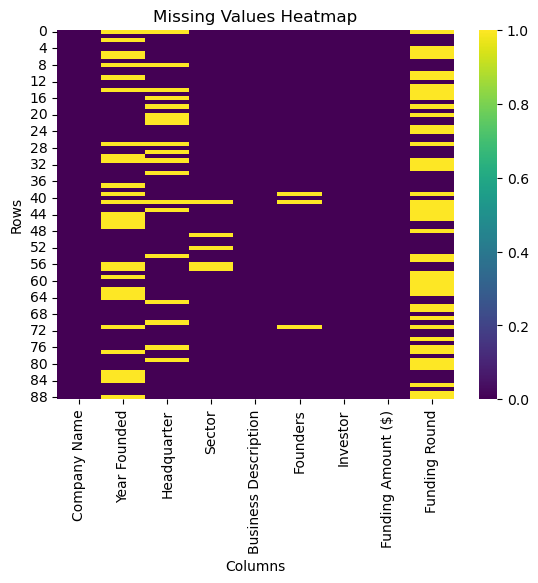

In [202]:
plot_missing_values_heatmap(data_2019)

#### Exploration Data Analysis

In [203]:
# Function to calculate descriptive statistics of a variable
def calculate_descriptive_stats(variable):
    return variable.describe()

# Function to plot the data distribution of a variable using a histogram
def plot_data_distribution(variable):
    plt.hist(variable)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.show()

# Function to check for missing values in a variable
def check_missing_values(variable):
    return variable.isnull().sum()

# check for duplicates of categorical values
def check_categorical_duplicates(data, variable):
    duplicates = data[variable].duplicated()
    duplicated_rows = data[duplicates]
    print('\n\n')
    print("Number of duplicates in '{}' variable: {}".format(variable, len(duplicated_rows)))
    print("\n")
    if not duplicated_rows.empty:
        print("Duplicate Rows:")
        print(duplicated_rows.head())
    return duplicated_rows


# detect outliers
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Function to perform univariate analysis on a variable
def perform_univariate_analysis(variable):
    # Descriptive Statistics
    print("Descriptive Statistics:")
    print(calculate_descriptive_stats(variable))
    print()

    
    # Missing Values
    print("Missing Values:")
    print(check_missing_values(variable))
    print()


#### **Company Name Exploration**

The **company name** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Number of Company Names
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

Data Exploration and Descriptive Statistics

In [204]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company Name'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

# Examine the most common company names
company_name_counts = data_2019['Company Name'].value_counts()
most_common_names = company_name_counts[company_name_counts == company_name_counts.max()]
print("\nMost Common Company Name(s):")
print(most_common_names)

Count of Unique Company Names: 87

Most Common Company Name(s):
Kratikal    2
Licious     2
Name: Company Name, dtype: int64


Number of Company Names

In [205]:
# Calculate the count of unique company names
unique_company_count = data_2019['Company Name'].nunique()
print("Count of Unique Company Names: {}".format(unique_company_count))

Count of Unique Company Names: 87


Remove leading, trailing spaces and Standardize case

In [206]:
# Remove leading and trailing spaces from the 'Company Name' column
data_2019['Company Name'] = data_2019['Company Name'].str.strip()

# standardize city name to lower case
data_2019['Company Name'] = data_2019['Company Name'].str.title()

Detect Duplicates

In [207]:
# check duplicates
check_categorical_duplicates(data_2019, 'Company Name')




Number of duplicates in 'Company Name' variable: 2


Duplicate Rows:
   Company Name  Year Founded    Headquarter      Sector  \
68      Licious        2015.0      Bangalore        Food   
82     Kratikal           NaN  Uttar pradesh  Technology   

                 Business Description                    Founders  \
68                   Online meat shop  Vivek Gupta, Abhay Hanjura   
82  Provides cyber security solutions              Pavan Kushwaha   

                                     Investor Funding Amount ($) Funding Round  
68                            Vertex Ventures        $25,000,000      Series D  
82  Gilda VC, Art Venture, Rajeev Chitrabhanu         $1,000,000  Pre-series A  


Company Name  Year Founded    Headquarter      Sector  \
68      Licious        2015.0      Bangalore        Food   
82     Kratikal           NaN  Uttar pradesh  Technology   

                 Business Description                    Founders  \
68                   Online meat shop  Vivek Gupta, Abhay Hanjura   
82  Provides cyber security solutions              Pavan Kushwaha   

                                     Investor Funding Amount ($) Funding Round  
68                            Vertex Ventures        $25,000,000      Series D  
82  Gilda VC, Art Venture, Rajeev Chitrabhanu         $1,000,000  Pre-series A

Handle missing values

In [208]:
# Check missing values
check_missing_values(data_2019['Company Name'])

0

#### **Year Founded Exploration**

**The "Year Founded"** variable is a quantitative variable representing the year in which each company was founded.
- Validate data format
- Handle missing values
- Identifying Outliers

Handle the missing values

In [209]:
# Create an instance of the SimpleImputer with the median strategy
array = data_2019['Year Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Year Founded'] = imputer.fit_transform(array)

Validate data format

In [210]:
# Convert the 'Year Founded' column to integer
data_2019['Year Founded'] = data_2019['Year Founded'].astype(int)

In [211]:
data_2019['Year Founded'].head()

0    2015
1    2014
2    2015
3    2014
4    2004
Name: Year Founded, dtype: int32

Detect Duplicates

In [212]:
# check duplicates
check_categorical_duplicates(data_2019, 'Year Founded')




Number of duplicates in 'Year Founded' variable: 77


Duplicate Rows:
  Company Name  Year Founded Headquarter           Sector  \
2     Eduisfun          2015      Mumbai           Edtech   
3     Homelane          2014     Chennai  Interior design   
5     Flytbase          2015        Pune       Technology   
6        Finly          2015   Bangalore             SaaS   
8    Quantiphi          2015         NaN        AI & Tech   

                                Business Description  \
2            It aims to make learning fun via games.   
3              Provides interior designing solutions   
5                        A drone automation platform   
6  It builds software products that makes work si...   
8  It is an AI and big data services company prov...   

                       Founders  \
2                 Jatin Solanki   
3  Srikanth Iyer, Rama Harinath   
5                   Nitin Gupta   
6     Vivek AG, Veekshith C Rai   
8                Renuka Ramnath   

            

Company Name  Year Founded    Headquarter  \
2                       Eduisfun          2015         Mumbai   
3                       Homelane          2014        Chennai   
5                       Flytbase          2015           Pune   
6                          Finly          2015      Bangalore   
8                      Quantiphi          2015            NaN   
10                    Cub Mcpaws          2010         Mumbai   
11                      Appnomic          2015      Bangalore   
14                   Open Secret          2015            NaN   
17                    Zest Money          2015      Bangalore   
18                       Witblox          2014            NaN   
19  Azah Personal Care Pvt. Ltd.          2018       Gurugram   
20                    Salaryfits          2015            NaN   
21                  Pristyn Care          2018            NaN   
22                   Springboard          2013            NaN   
23            Dror Labs Pvt. Ltd          2018          Delhi   
24                       Medlife          2014      Bangalore   
25                       Seekify          2019          Delhi   
26              Toffee Insurance          2017        Haryana   
27                 Fireflies .Ai          2015            NaN   
28                     Hungerbox          2015      Bangalore   
29                         Bijak          2019            NaN   
30                       Licious          2015      Bangalore   
31                         Trume          2015            NaN   
32                      Pumpkart          2014     Chandigarh   
33             Asteria Aerospace          2011      Bangalore   
34                        Rivigo          2014            NaN   
35                   Happyeasygo          2017       Gurugram   
36                       Zetwerk          2018      Bangalore   
37                    Observe.Ai          2015      Bangalore   
39  Lil’ Goodness And Scool Meal          2015      Bangalore   
40                         Trell          2016      Bangalore   
41                         Vmate          2015            NaN   
43                       Slintel          2016            NaN   
44                    Mygamemate          2015      Bangalore   
45                        Afinoz          2015          Noida   
46                    Rein Games          2015          Noida   
47                        Ecozen          2015           Pune   
48                          Box8          2011         Mumbai   
49             Awign Enterprises          2016      Bangalore   
50                       Purplle          2012         Mumbai   
51                  Freightwalla          2017         Mumbai   
52                      Tapchief          2016      Bangalore   
53                        Ejohri          2015         Mumbai   
54                     Ninjacart          2015            NaN   
55                   Binca Games          2014         Mumbai   
56                         Kredx          2015      Bangalore   
57                       M.Paani          2015         Mumbai   
58                         Origo          2010       Gurugram   
59                     Wishadish          2015          Delhi   
60                  Ecom Express          2012       Gurugram   
61                 Stanza Living          2017          Delhi   
62                        Pibeam          2015        Chennai   
63                  Euler Motors          2015          Delhi   
64                       Moms Co          2015      New Delhi   
65                  Cubical Labs          2013            NaN   
66                      Lawyered          2015          Delhi   
67                       Cuemath          2013      Bangalore   
68                       Licious          2015      Bangalore   
69                    Nivesh.Com          2016          Noida   
70                          Zebu          2015            NaN   
71               Smart Institute          2015         

#### **Explore Headquarter**

**The "Headquater"** variable is a categorical variable representing the city in which each company is Located.
- Remove leading, trailing spaces and Standardize case
- Handle missing values
- Number of cities
- Examine the most common cities

Remove leading, trailing spaces and Standardize case

In [213]:
# Standardize case
data_2019['Headquarter'] = data_2019['Headquarter'].str.title()

# Remove leading and trailing spaces
data_2019['Headquarter'] = data_2019['Headquarter'].str.strip()

Handle the missing Values

In [214]:
# fill the null categorical values with 'Unknown'
data_2019['Headquarter'] = data_2019['Headquarter'].fillna('Unknown')

All Headquarter cities

In [215]:
# Calculate the count of unique cities
unique_city_count = data_2019['Headquarter'].nunique()
print("Count of Unique Cities: {}".format(unique_city_count))

Count of Unique Cities: 18


Examine the most common cities

In [216]:
# Examine the most common cities
city_counts = data_2019['Headquarter'].value_counts()
most_common_cities = city_counts[city_counts == city_counts.max()]
print("\nMost Common Cities:")
print(most_common_cities)


Most Common Cities:
Bangalore    21
Name: Headquarter, dtype: int64


#### **Explore Sector**

 INTRO

Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Clean sector name
- Remove leading, trailing spaces and Standardize case
- Handle missing values

Data Exploration and Descriptive Statistics

In [217]:
# Calculate the count of unique sectors
unique_sector_count = data_2019['Sector'].nunique()
print("Count of Unique Sectors: {}".format(unique_sector_count))

# Examine the most common sectors
sector_counts = data_2019['Sector'].value_counts()
most_common_sectors = sector_counts[sector_counts == sector_counts.max()]
print("\nMost Common Sectors:")
print(most_common_sectors)

Count of Unique Sectors: 52

Most Common Sectors:
Edtech    7
Name: Sector, dtype: int64


Clean sector names

In [218]:
# cleaning sectory names
sector_replacements = {
    'AI & Tech': 'AI',
    'Ai': 'AI',
    'Automobile & Technology': 'Automobile',
    'Automotive tech': 'Automobile',
    'Automotive Tech': 'Automobile',
    'B2B Supply Chain': 'B2B',
    'E-commerce & AR': 'E-commerce',
    'E-commerce & Ar': 'E-commerce',
    'E-Commerce & Ar': 'E-commerce',
    'Ecommerce': 'E-commerce',
    'Food & Nutrition': 'Food',
    'Food & tech': 'Food',
    'Food & Tech': 'Food',
    'Food Tech': 'Food',
    'Foodtech': 'Food',
    'Games': 'Gaming',
    'Healthcare': 'Health',
    'Healthtech': 'Health',
    'Manufacturing': 'Industrial',
    'Marketing & Customer loyalty': 'Marketing',
    'Marketing & Customer Loyalty': 'Marketing',
    'Pharmaceutical': 'Pharma',
    'Robotics & AI': 'AI',
    'Robotics & Ai': 'AI',
    'SaaS': 'Software',
    'Safety tech': 'Security',
    'Social Media': 'SocialMedia',
    'Transport & Rentals': 'Transportation',
    'Virtual Banking': 'Banking',
    'Yoga & wellness': 'Wellness',
    'Hr Tech': "Human Resource",
    'Ai & Tech': 'AI',
}
data_2019['Sector'] = data_2019['Sector'].replace(sector_replacements)

Remove leading, trailing spaces and Standardize case

In [219]:
# Standardize case
data_2019['Sector'] = data_2019['Sector'].str.title()

# Remove leading and trailing spaces
data_2019['Sector'] = data_2019['Sector'].str.strip()

#### Handle missing values

In [220]:
# Handle missing values
data_2019['Sector'] = data_2019['Sector'].fillna('Unknown')

#### **Explore Business Description**

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.

- Text cleaning

Text cleaning

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.

- Text cleaning

Text cleaning

In [221]:
# Text cleaning
data_2019['Business Description'] = data_2019['Business Description'].str.replace('[^\w\s]', '')
data_2019['Business Description'] = data_2019['Business Description'].str.lower()

**Explore Founders**

The **Intro** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Handle missing values

#### Data Exploration and Descriptive Statistics

In [222]:
# Calculate the count of unique founder names
unique_founders_count = data_2019['Founders'].nunique()
print("Count of Unique Founders: {}".format(unique_founders_count))

# Examine the most common Founderss
founders_name_counts = data_2019['Founders'].value_counts()
most_common_founders = founders_name_counts[founders_name_counts == founders_name_counts.max()]
print("\nMost Common Founders(s):")
print(most_common_founders)

Count of Unique Founders: 85

Most Common Founders(s):
Vivek Gupta, Abhay Hanjura    2
Name: Founders, dtype: int64


Remove leading, trailing spaces and Standardize case


In [223]:
# Cleaning founder names
data_2019['Founders'] = data_2019['Founders'].map(lambda x:str(x).split(',')[0])

#### Handle missing values


In [224]:
# Replacing 'Unknown' with an empty string for single Founders
data_2019['Founders'] = data_2019['Founders'].replace('', 'Unknown')

# replace all the null values with 'Unknown'
data_2019['Founders'] = data_2019['Founders'].fillna('Unknown')

#### **Explore Investor**

The **variable** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove leading, trailing spaces and Standardize case
- Detect duplicates
- Handle missing values

Data Exploration and Descriptive Statistics

In [225]:
# Calculate the count of unique Investor names
unique_investors_count = data_2019['Investor'].nunique()
print("Count of Unique Investors: {}".format(unique_investors_count))

# Examine the most common Investors
investors_name_counts = data_2019['Investor'].value_counts()
most_common_Investors = investors_name_counts[investors_name_counts == investors_name_counts.max()]
print("\nMost Common Investor(s):")
print(most_common_Investors)

Count of Unique Investors: 86

Most Common Investor(s):
Undisclosed    3
Name: Investor, dtype: int64


Remove leading, trailing spaces and Standardize case

In [226]:
# Cleaning Investor names
data_2019['Investor'] = data_2019['Investor'].str.strip()
data_2019['Investor'] = data_2019['Investor'].str.split(',')

# Formatting Investors
data_2019['Investor'] = data_2019['Investor'].apply(lambda x: ' & '.join([str(name).strip() for name in x]))

In [227]:
data_2019['Investor'].head(10)

0                                 Sixth Sense Ventures
1                                     General Atlantic
2     Deepak Parekh & Amitabh Bachchan & Piyush Pandey
3    Evolvence India Fund (EIF) & Pidilite Group & ...
4             Innovation in Food and Agriculture (IFA)
5                                          Undisclosed
6    Social Capital & AngelList India & Gemba Capit...
7         Gilda VC & Art Venture & Rajeev Chitrabhanu.
8                 Multiples Alternate Asset Management
9                                             SoftBank
Name: Investor, dtype: object

#### Handle missing values


In [228]:
# Replacing 'Unknown' with an empty string for single Investor
data_2019['Investor'] = data_2019['Investor'].replace('','Unknown')

# replace all the null values with 'Unknown'
data_2019['Investor'] = data_2019['Investor'].fillna('Unknown')

#### **Explore Funding Amount**

The **company name** variable is a categorical variable. It represents the names of different companies in the dataset.


Data Cleaning Steps:
- Data Exploration and Descriptive Statistics
- Remove and replacing empty spaces, leading and trailing spaces
- Handle missing values
- Visualize the distribution
- Detecting and removing Outliers

In [229]:

data_2019['Funding Amount ($)']

0       $6,300,000
1     $150,000,000
2      $28,000,000
3      $30,000,000
4       $6,000,000
5      Undisclosed
6      Undisclosed
7       $1,000,000
8      $20,000,000
9     $275,000,000
10     Undisclosed
11     $22,000,000
12      $5,000,000
13        $140,500
14     Undisclosed
15      $5,000,000
16    $540,000,000
17     $15,000,000
18        $182,700
19     Undisclosed
20      $5,000,000
21     $12,000,000
22     $11,000,000
23     Undisclosed
24     $15,500,000
25      $1,500,000
26      $5,500,000
27      $5,000,000
28     $12,000,000
29      $2,500,000
30     $30,000,000
31        $140,000
32     Undisclosed
33    $230,000,000
34     $20,000,000
35     $49,400,000
36     $32,000,000
37     $26,000,000
38        $150,000
39        $400,000
40      $2,000,000
41    $100,000,000
42      $8,000,000
43      $1,500,000
44        $100,000
45     Undisclosed
46     $50,000,000
47      $6,000,000
48    $120,000,000
49      $4,000,000
50     $30,000,000
51      $4,000,000
52      $1,5

Data Exploration and Descriptive Statistics

In [230]:
# Data Exploration and Descriptive Statistics
print("Descriptive Statistics:")
print(data_2019['Funding Amount ($)'].describe())
print()

Descriptive Statistics:
count              89
unique             50
top       Undisclosed
freq               12
Name: Funding Amount ($), dtype: object



Remove and replacing empty spaces, leading and trailing spaces

In [231]:
# Remove the dollar sign
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].str.replace('$','').replace(',', '', regex=True)

# Cleaning the Funding Amount ($)
data_2019['Funding Amount ($)'] = pd.to_numeric(data_2019['Funding Amount ($)'], errors='coerce')

Handle Undisclosed Values

In [232]:
# handling undisclosed
data_2019['Funding Amount ($)'] = data_2019['Funding Amount ($)'].replace('Undisclosed', np.nan)

In [233]:
# Create an instance of the SimpleImputer with the median strategy
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the 'Year Founded' column and transform the column to impute missing values
data_2019['Funding Amount ($)'] = imputer.fit_transform(data_2019[['Funding Amount ($)']])

#### Detecting and removing Outliers

### Detecting and removing Outliers

In [234]:
data_2019['Funding Amount ($)'].describe()

count          89.0
mean     38297002.2
std     103599437.8
min        100000.0
25%       4000000.0
50%       6000000.0
75%      26000000.0
max     693000000.0
Name: Funding Amount ($), dtype: float64

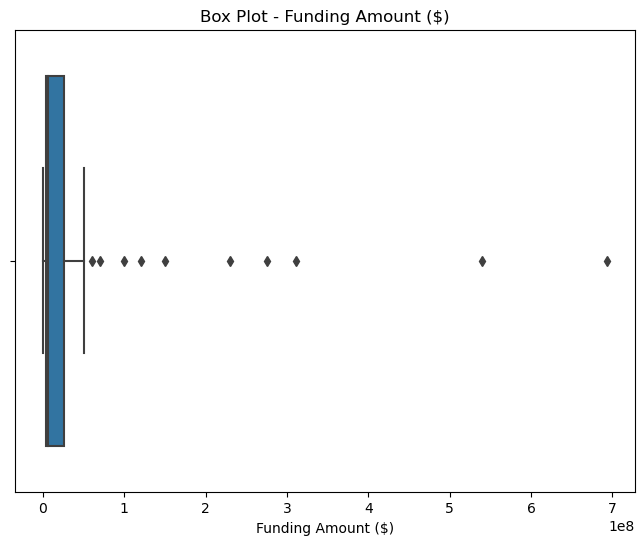

In [235]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

#### Handle Outliers

In [236]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers: {}".format(len(outliers)))
print()

# removing outliers:
data_2019 = data_2019[~data_2019['Funding Amount ($)'].isin(outliers['Funding Amount ($)'])]

# Verify if outliers were handled
outliers_after_handling = detect_outliers(data_2019, 'Funding Amount ($)')
print("Number of Outliers after Handling: {}".format(len(outliers_after_handling)))

Number of Outliers: 10

Number of Outliers after Handling: 7


After handling the outliers

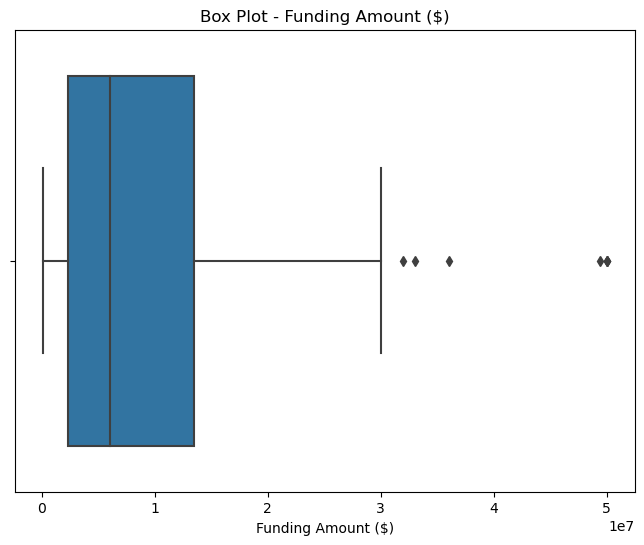

In [237]:
# Box Plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data_2019['Funding Amount ($)'])
plt.title('Box Plot - Funding Amount ($)')
plt.xlabel('Funding Amount ($)')
plt.show()

In [238]:
# Detecting outliers:
outliers = detect_outliers(data_2019, 'Funding Amount ($)')
print("\nNumber of Outliers reduced to: {}".format(len(outliers)))
print()


Number of Outliers reduced to: 7



#### **Explore Funding Round**

Clean Funding Round names

In [239]:
#cleaning Funding round names
funding_round_replacement = {
    "Seed Round" : "Seed",
    "Pre series A": "Pre-series A",
    "Pre Series A" : "Pre-series A" ,
    "Seed round" :   "Seed",
    "Pre seed round" :"Pre-seed",
    "Series B2" :    "Series B",
    "Pre series B" : "Pre-series B",
    "Seed Funding" : "Seed",
    "Pre-Series B" : "Pre-series B",
    "Pre-Seed"  :    "Pre-seed",
    "Seed funding" : "Seed",
    "Pre-seed Round" :"Pre-seed",
    "Series E2" :     "Series E",
    "Pre series A1" : "Pre-series A",
    "Series D1" :     "Series",
    "Pre seed Round" :"Pre-seed",
    "Pre series C"  : "Pre-Series C",
    "Bridge Round" :  "Bridge",
    "Series A-1" :    "Series",
    "Pre- series A":  "Pre-series A",
    "Seed Investment" :"Seed"
}
data_2019['Funding Round'] = data_2019['Funding Round'].replace(funding_round_replacement)

#### Handle missing values

In [240]:
data_2019['Funding Round'] = data_2019['Funding Round'].fillna('Unknown')

Preview after Data cleaning

check for any missing values in the dataset



 No missing values found. Data cleaning is complete


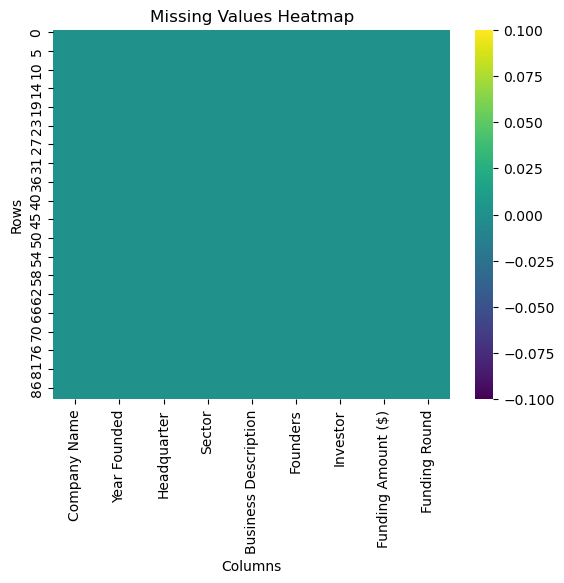

In [241]:
# check for any missing values
missing_values = data_2019.isnull().sum()
if missing_values.any():
    print("\n\nMissing values still exist in the dataset")
else:
    print("\n\n No missing values found. Data cleaning is complete")

# plot missing values
plot_missing_values_heatmap(data_2019)

#### Check for Duplicates

In [242]:
duplicates = data_2019.duplicated()
if duplicates.any():
    print("\n\nDuplicate records still exist in the dataset.")
else:
    print("\n\nNo duplicate records found. Data cleaning is complete.")




No duplicate records found. Data cleaning is complete.


#### 3.2.3  2020 Data

<h4>Data Exploration. The columns in the data are:</h4>
<div>
<li style="list-style: none;">
<ol>Company_Brand</ol>
<ol>Founded</ol>
<ol>HeadQuarter</ol>
<ol>Sector</ol>
<ol>What_it_does</ol>
<ol>Founders</ol>
<ol>Investor</ol>
<ol>Amount</ol>
<ol>Stage</ol>
<ol>column10</ol>
</li>
</div>


In [243]:
#display the columns in the dataframe
data2020.columns

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage', 'column10'],
      dtype='object')

In [244]:
#display the datatypes in each column
data2020.dtypes

Company_Brand     object
Founded          float64
HeadQuarter       object
Sector            object
What_it_does      object
Founders          object
Investor          object
Amount           float64
Stage             object
column10          object
dtype: object

In [245]:
#shape of the data
data2020.shape

(1055, 10)

In [246]:
#give an overview of each column

#Founded
data2020['Founded']#represents year founded should be date
data2020['column10']

#column 10

#check if to drop column 10 since it has all null values
data2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [247]:
#amount column 
# Use describe() function
summary=data2020['Amount'].dropna().describe()
# Set the option to display large numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Print the summary
summary



count           801.00
mean      113042969.54
std      2476634939.89
min           12700.00
25%         1000000.00
50%         3000000.00
75%        11000000.00
max     70000000000.00
Name: Amount, dtype: float64

<span>

<h3>Decisions made:</h3>
<!-- <span style="color:orange"> -->
<li style="list-style: none; font-type: italics;">
<ol> Change the <span style="color:orange">Founded</span> to <span style="color:orange">year</span> in date type </ol>
<ol> Drop <span style="color:orange">column 10</span> </ol>
<ol> Replace missing numerical columns with values with mean value </ol>
<ol>Convert <span style="color:orange">Founded</span> to date </ol>
</li>

</span>







In [248]:
#summary statistics Founded
#amount column 
# Use describe() function
summary=data2020['Founded'].dropna().describe()
# Set the option to display large numbers without scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Print the summary
summary



count    842.00
mean    2015.36
std        4.10
min     1973.00
25%     2014.00
50%     2016.00
75%     2018.00
max     2020.00
Name: Founded, dtype: float64

In [249]:
#drop the column named column 10
# Assuming data2020 is your DataFrame and 'column_name' is the column you want to drop
data2020=data2020.drop(['column10'],axis=1)
#data2020


In [250]:
#the most recurring year
data2020['Founded'].mode()

0   2015.00
Name: Founded, dtype: float64

In [251]:
#Imputing missing values in the amount column using simple imputer method

array= data2020["Amount"].values.reshape(-1,1)

imputer=SimpleImputer(strategy="median")




data2020["Amount"]=imputer.fit_transform(array)
#data2020

In [252]:
#Imputing missing values in the Founded column using simple imputer method with most frequest value

array= data2020["Founded"].values.reshape(-1,1)

imputer=SimpleImputer(strategy="most_frequent")


data2020["Founded"]=imputer.fit_transform(array)
#data2020


In [253]:
data2020.isnull().sum()

Company_Brand      0
Founded            0
HeadQuarter       94
Sector            13
What_it_does       0
Founders          12
Investor          38
Amount             0
Stage            464
dtype: int64

In [254]:
data2020['Stage'].mode()

0    Series A
Name: Stage, dtype: object

In [255]:
data2020.replace({"Stage": {"Seed Round" : "Seed",

                            "Pre series A": "Pre-series A",

                            "Pre Series A" : "Pre-series A" ,

                            "Seed round" :   "Seed",

                            "Pre seed round" :"Pre-seed",

                            "Series B2" :    "Series B",

                            "Pre series B" : "Pre-series B",

                            "Seed Funding" : "Seed",

                            "Pre-Series B" : "Pre-series B",

                            "Pre-Seed"  :    "Pre-seed",

                            "Seed funding" : "Seed",

                            "Pre-seed Round" :"Pre-seed",

                            "Series E2" :     "Series E",

                            "Pre series A1" : "Pre-series A",

                            "Series D1" :     "Series",

                            "Pre seed Round" :"Pre-seed",

                            "Pre series C"  : "Pre-Series C",

                            "Bridge Round" :  "Bridge",

                            "Series A-1" :    "Series",

                            "Pre- series A":  "Pre-series A",

                            "Seed Investment" :"Seed"}},inplace =True)

In [256]:
#replace the stage value with the most occuring stage for the missing values


array= data2020["Stage"].values.reshape(-1,1)

imputer=SimpleImputer(strategy="most_frequent")




data2020["Stage"]=imputer.fit_transform(array)
#data2020

In [257]:
data2020=data2020.fillna('Undisclosed')
data2020

Company_Brand  Founded  \
0                                Aqgromalin  2019.00   
1                                  Krayonnz  2019.00   
2                              PadCare Labs  2018.00   
3                                     NCOME  2020.00   
4                                Gramophone  2016.00   
5                                    qZense  2019.00   
6                              MyClassboard  2008.00   
7                                     Metvy  2018.00   
8                                    Rupeek  2015.00   
9                                 Gig India  2017.00   
10                              Slurrp Farm  2016.00   
11                                   Medfin  2017.00   
12                                  MasterG  2015.00   
13                                 Brila 91  2014.00   
14                               FoodyBuddy  2015.00   
15                                   Zomato  2008.00   
16                                OurEye.ai  2020.00   
17                               Shiprocket  2017.00   
18                                Pine Labs  1998.00   
19                        Moneyboxx Finance  2019.00   
20                                     EWar  2019.00   
21                       SucSEED Indovation  2016.00   
22                             TaxBuddy.com  2019.00   
23                        Awign Enterprises  2016.00   
24                         Circle of Angels  2018.00   
25                                  CoinDCX  2017.00   
26                                   Glance  2016.00   
27                         VerSe Innovation  2007.00   
28                                    Voosh  2020.00   
29                                Delhivery  2011.00   
30                                     Arya  1982.00   
31                                   Pickrr  2015.00   
32                                  PhonePe  2015.00   
33                             Countingwell  2018.00   
34                               Callify.ai  2016.00   
35                                    Hudle  2016.00   
36                              Cover it Up  2013.00   
37                                BiteSpeed  2019.00   
38                                  WakeFit  2016.00   
39                 Sreyas Holistic Remedies  2008.00   
40                             Fleeca India  2016.00   
41                                M1xchange  2017.00   
42                                   Exotel  2011.00   
43                                PagarBook  2019.00   
44                         PointOne Capital  2020.00   
45                                    Ayana  2017.00   
46                                   Fisdom  2015.00   
47                            Tinker Coders  2020.00   
48                          Infinite Uptime  2015.00   
49                              HappyLocate  2016.00   
50                                  PhonePe  2015.00   
51                              Loop Health  2017.00   
52                                  NeoDocs  2020.00   
53                               The ePlane  2016.00   
54                                 TagMango  2019.00   
55                             The New Shop  2019.00   
56                                 MobiKwik  2009.00   
57                              DebugsBunny  2020.00   
58                          BHIVE Investech  2014.00   
59                                   Rivigo  2014.00   
60                                  ZipLoan  2015.00   
61                                   Swipez  2014.00   
62                                    Humus  2019.00   
63                             Artivatic.ai  2017.00   
64                                Prescinto  2016.00   
65                                   Toppeq  2019.00   
66                               Bolo Indya  2019.00   
67                              Bombay Play  2017.00   
68                              FreshToHome  2015.00   
69                                  KIKO TV  2020.00   
70                    Atomberg Technologies  2012.00  

In [258]:
data2020.isnull().sum()
data2020

Company_Brand  Founded  \
0                                Aqgromalin  2019.00   
1                                  Krayonnz  2019.00   
2                              PadCare Labs  2018.00   
3                                     NCOME  2020.00   
4                                Gramophone  2016.00   
5                                    qZense  2019.00   
6                              MyClassboard  2008.00   
7                                     Metvy  2018.00   
8                                    Rupeek  2015.00   
9                                 Gig India  2017.00   
10                              Slurrp Farm  2016.00   
11                                   Medfin  2017.00   
12                                  MasterG  2015.00   
13                                 Brila 91  2014.00   
14                               FoodyBuddy  2015.00   
15                                   Zomato  2008.00   
16                                OurEye.ai  2020.00   
17                               Shiprocket  2017.00   
18                                Pine Labs  1998.00   
19                        Moneyboxx Finance  2019.00   
20                                     EWar  2019.00   
21                       SucSEED Indovation  2016.00   
22                             TaxBuddy.com  2019.00   
23                        Awign Enterprises  2016.00   
24                         Circle of Angels  2018.00   
25                                  CoinDCX  2017.00   
26                                   Glance  2016.00   
27                         VerSe Innovation  2007.00   
28                                    Voosh  2020.00   
29                                Delhivery  2011.00   
30                                     Arya  1982.00   
31                                   Pickrr  2015.00   
32                                  PhonePe  2015.00   
33                             Countingwell  2018.00   
34                               Callify.ai  2016.00   
35                                    Hudle  2016.00   
36                              Cover it Up  2013.00   
37                                BiteSpeed  2019.00   
38                                  WakeFit  2016.00   
39                 Sreyas Holistic Remedies  2008.00   
40                             Fleeca India  2016.00   
41                                M1xchange  2017.00   
42                                   Exotel  2011.00   
43                                PagarBook  2019.00   
44                         PointOne Capital  2020.00   
45                                    Ayana  2017.00   
46                                   Fisdom  2015.00   
47                            Tinker Coders  2020.00   
48                          Infinite Uptime  2015.00   
49                              HappyLocate  2016.00   
50                                  PhonePe  2015.00   
51                              Loop Health  2017.00   
52                                  NeoDocs  2020.00   
53                               The ePlane  2016.00   
54                                 TagMango  2019.00   
55                             The New Shop  2019.00   
56                                 MobiKwik  2009.00   
57                              DebugsBunny  2020.00   
58                          BHIVE Investech  2014.00   
59                                   Rivigo  2014.00   
60                                  ZipLoan  2015.00   
61                                   Swipez  2014.00   
62                                    Humus  2019.00   
63                             Artivatic.ai  2017.00   
64                                Prescinto  2016.00   
65                                   Toppeq  2019.00   
66                               Bolo Indya  2019.00   
67                              Bombay Play  2017.00   
68                              FreshToHome  2015.00   
69                                  KIKO TV  2020.00   
70                    Atomberg Technologies  2012.00  

In [259]:
global_sector=pd.read_csv('data/global_ind.csv',delimiter=',')
global_sector.dropna(inplace=True)
global_sector.columns

Index(['Industry Group', 'Industries'], dtype='object')

In [260]:
# Create a new column named "global_sector" in the data2020 DataFrame
data2020["global_sector"] = ""

# Loop through each row in the data2020 DataFrame
for index, row in data2020.iterrows():
    sector = row["Sector"]
    
    # Find the best match for the sector value using fuzzy matching
    matches = process.extractOne(sector, global_sector["Industries"])
    
    # If a match is found with a similarity score of 50% or higher, assign the corresponding global industry value to the "global_sector" column in data2020 DataFrame
    if matches[1] >= 49.9:
        global_sector_val = global_sector.loc[matches[2], "Industry Group"]
        data2020.at[index, "global_sector"] = global_sector_val

# Print the updated data2020 DataFrame
data2020 

Company_Brand  Founded  \
0                                Aqgromalin  2019.00   
1                                  Krayonnz  2019.00   
2                              PadCare Labs  2018.00   
3                                     NCOME  2020.00   
4                                Gramophone  2016.00   
5                                    qZense  2019.00   
6                              MyClassboard  2008.00   
7                                     Metvy  2018.00   
8                                    Rupeek  2015.00   
9                                 Gig India  2017.00   
10                              Slurrp Farm  2016.00   
11                                   Medfin  2017.00   
12                                  MasterG  2015.00   
13                                 Brila 91  2014.00   
14                               FoodyBuddy  2015.00   
15                                   Zomato  2008.00   
16                                OurEye.ai  2020.00   
17                               Shiprocket  2017.00   
18                                Pine Labs  1998.00   
19                        Moneyboxx Finance  2019.00   
20                                     EWar  2019.00   
21                       SucSEED Indovation  2016.00   
22                             TaxBuddy.com  2019.00   
23                        Awign Enterprises  2016.00   
24                         Circle of Angels  2018.00   
25                                  CoinDCX  2017.00   
26                                   Glance  2016.00   
27                         VerSe Innovation  2007.00   
28                                    Voosh  2020.00   
29                                Delhivery  2011.00   
30                                     Arya  1982.00   
31                                   Pickrr  2015.00   
32                                  PhonePe  2015.00   
33                             Countingwell  2018.00   
34                               Callify.ai  2016.00   
35                                    Hudle  2016.00   
36                              Cover it Up  2013.00   
37                                BiteSpeed  2019.00   
38                                  WakeFit  2016.00   
39                 Sreyas Holistic Remedies  2008.00   
40                             Fleeca India  2016.00   
41                                M1xchange  2017.00   
42                                   Exotel  2011.00   
43                                PagarBook  2019.00   
44                         PointOne Capital  2020.00   
45                                    Ayana  2017.00   
46                                   Fisdom  2015.00   
47                            Tinker Coders  2020.00   
48                          Infinite Uptime  2015.00   
49                              HappyLocate  2016.00   
50                                  PhonePe  2015.00   
51                              Loop Health  2017.00   
52                                  NeoDocs  2020.00   
53                               The ePlane  2016.00   
54                                 TagMango  2019.00   
55                             The New Shop  2019.00   
56                                 MobiKwik  2009.00   
57                              DebugsBunny  2020.00   
58                          BHIVE Investech  2014.00   
59                                   Rivigo  2014.00   
60                                  ZipLoan  2015.00   
61                                   Swipez  2014.00   
62                                    Humus  2019.00   
63                             Artivatic.ai  2017.00   
64                                Prescinto  2016.00   
65                                   Toppeq  2019.00   
66                               Bolo Indya  2019.00   
67                              Bombay Play  2017.00   
68                              FreshToHome  2015.00   
69                                  KIKO TV  2020.00   
70                    Atomberg Technologies  2012.00  

#### 3.2.4 2021 Data

Inspect the data

In [261]:
data2021.head(10) # View first 10 rows of data2021

Company_Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics  2019.00   Bangalore      AI startup   
1          upGrad  2015.00      Mumbai          EdTech   
2     Lead School  2012.00      Mumbai          EdTech   
3         Bizongo  2015.00      Mumbai  B2B E-commerce   
4        FypMoney  2021.00    Gurugram         FinTech   
5   Urban Company  2014.00   New Delhi   Home services   
6  Comofi Medtech  2018.00   Bangalore      HealthTech   
7     Qube Health  2016.00      Mumbai      HealthTech   
8        Vitra.ai  2020.00   Bangalore    Tech Startup   
9          Taikee  2010.00      Mumbai      E-commerce   

                                        What_it_does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   
5  Urban Company (Formerly UrbanClap) is a home a...   
6   Comofi Medtech is a healthcare robotics startup.   
7  India's Most Respected Workplace Healthcare Ma...   
8  Vitra.ai is an AI-based video translation plat...   
9  Taikee is the ISO-certified, B2B e-commerce pl...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   
5  Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan   
6                                         Gururaj KB   
7                                        Gagan Kapur   
8                                     Akash Nidhi PS   
9                 Nidhi Ramachandran, Sachin Chhabra   

                                        Investor        Amount         Stage  
0                    BEENEXT, Entrepreneur First    $1,200,000  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management  $120,000,000          None  
2               GSV Ventures, Westbridge Capital   $30,000,000      Series D  
3                         CDC Group, IDG Capital   $51,000,000      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal    $2,000,000          Seed  
5                                     Vy Capital  $188,000,000          None  
6                              CIIE.CO, KIIT-TBI      $200,000          None  
7                      Inflection Point Ventures   Undisclosed  Pre-series A  
8                              Inflexor Ventures   Undisclosed          None  
9                                           None    $1,000,000          None

In [262]:
# Get summarised info about missing values and data types of the columns in data2021

data2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


From the displayed information about data2021,:

* *Founded*, *HeadQuarter*, *Founders*, *Investor*, *Amount* and *Stage* columns have some missing data
* All columns are of the object data type except *Founded* which is a float.

We take a critical look at all the data

In [263]:
pd.set_option('display.max_rows', None) # Set option for the full display of all rows


data2021

Company_Brand  Founded  \
0                      Unbox Robotics  2019.00   
1                              upGrad  2015.00   
2                         Lead School  2012.00   
3                             Bizongo  2015.00   
4                            FypMoney  2021.00   
5                       Urban Company  2014.00   
6                      Comofi Medtech  2018.00   
7                         Qube Health  2016.00   
8                            Vitra.ai  2020.00   
9                              Taikee  2010.00   
10                          Fitterfly  2016.00   
11                          FreeStand  2017.00   
12                       MyDentalPlan  2014.00   
13                       Freyr Energy  2014.00   
14                          DealShare  2018.00   
15                           Tessolve  1993.00   
16                       Smart Joules  2014.00   
17                               ORAI  2020.00   
18                            ixamBee  2016.00   
19                   CoinSwitch Kuber  2017.00   
20                           Razorpay  2014.00   
21                              Uable  2020.00   
22                    ZFW Hospitality  2015.00   
23              Optimized Electrotech  2017.00   
24                       Northern Arc  2008.00   
25                              Chara  2019.00   
26                     Sirona Hygiene  2015.00   
27                       Pristyn Care  2018.00   
28                         TrulyMadly  2013.00   
29                           Vidyakul  2018.00   
30                       Jambox Games  2021.00   
31                               Miko  2015.00   
32                             SuperK  2019.00   
33                         TagZ Foods  2019.00   
34                         Fuel Buddy  2017.00   
35                          M1xchange  2017.00   
36                            Spintly  2017.00   
37                         EF Polymer  2018.00   
38                               boAt  2016.00   
39                           TruNativ  2019.00   
40                               iBus  2010.00   
41                       Puresh Daily  2019.00   
42                          LearnVern  2016.00   
43                           LimeChat  2020.00   
44                               Dybo  2019.00   
45                            moEVing  2021.00   
46                       WeWork India  2017.00   
47                        Solethreads  2018.00   
48                            Beldara  2018.00   
49                           CredFlow  2020.00   
50                       Do Your Thng  2018.00   
51                       Oye Rickshaw  2017.00   
52                         Legitquest  2017.00   
53                             Swiggy  2014.00   
54                             AntWak  2019.00   
55                          PlayShifu  2016.00   
56                            Pitstop  2015.00   
57                        Lendingkart  1999.00   
58                               CRED  2018.00   
59                           Karnival  2015.00   
60                          PharmEasy  2015.00   
61                               WESS  1989.00   
62                             ShopSe  2020.00   
63                     Fantasy Akhada  2020.00   
64                        Rage Coffee  2018.00   
65                              Groww  2017.00   
66                     Avanti Finance  2016.00   
67                              Kudos  2014.00   
68                         OfBusiness  2015.00   
69                        Superpro.ai  2019.00   
70                          ShareChat  2015.00   
71                            WiT-ACE  2020.00   
72                             Spinny  2015.00   
73                    Alteria Capital  2018.00   
74                           Safexpay  2017.00   
75                          PumPumPum  2018.00   
76                    Speciale Invest  2017.00   
77                           Eunimart  2016.00   
78                             Meesho  2015.00   
79                      

### Issues arising from data2021:

* Founded column is a float. It has to be a date

* Some Amounts have $undisclosed, Undisclosed and undisclosed. We may treat them as missing values

* The Amounts and Stage for FanPlay company at index 98 are interchanged

* At index 242, 256, 257, and 545, the amount appears at the investor’s column and then stage at the amount column

* Little Leap at   at index 538 has Ah! Ventures(investors) instead of amount and then amount at stage column. Also, ‘Holistic Development Programs for children in …; should be   replaced with Vishal Gupta as founder.

* BHyve company index 551 has part of ‘what_it_does’ at founders cl then founders at investor cl and investors at amount col ……. It also had investor’s name as ITO Angel Network instead of JITO Angel Network

* Some amounts are separated by ‘,’ some too have ‘$$’ preceding them and some only ‘$’ as amount…this is for EventBeep, MPL

* Amount for Godamwale at index 1148 is misspelt as 1000000\t#REF! instead of 1000000 and is at investor col with stage rather taking its place. Also, the investor is **Capt. Anand Aryamane**

* for index 1100-Sochcast company, Heaquarter is replaced with ‘Online Media\t#REF!’ and sector
* There are some duplicates

#### Resolution

* Delete duplicates
* Update misplaced values for the specifi rows and columns
* Impute with right values from credible sources where such values are mispelt or omitted
* Convert columns to right data types
* Standardise the 'Stage' column for good analysis by renaming or grouping

#### Delete Duplicates

In [264]:
# Confirm duplicated records

data2021.duplicated().sum()

19

Let's take a look, first.

In [265]:
data2021[data2021.duplicated()].head()

Company_Brand  Founded     HeadQuarter             Sector  \
107       Curefoods  2020.00       Bangalore   Food & Beverages   
109        Bewakoof  2012.00          Mumbai  Apparel & Fashion   
111         FanPlay  2020.00  Computer Games     Computer Games   
117  Advantage Club  2014.00          Mumbai             HRTech   
119          Ruptok  2020.00       New Delhi            FinTech   

                                          What_it_does  \
107  Healthy & nutritious foods and cold pressed ju...   
109  Bewakoof is a lifestyle fashion brand that mak...   
111  A real money game app specializing in trivia g...   
117  Advantage Club is India's largest employee eng...   
119  Ruptok fintech Pvt. Ltd. is an online gold loa...   

                               Founders  \
107                        Ankit Nagori   
109                    Prabhkiran Singh   
111                              YC W21   
117  Sourabh Deorah, Smiti Bhatt Deorah   
119                         Ankur Gupta   

                                     Investor     Amount     Stage  
107       Iron Pillar, Nordstar, Binny Bansal  $13000000      None  
109                                InvestCorp   $8000000      None  
111               Pritesh Kumar, Bharat Gupta   Upsparks  $1200000  
117  Y Combinator, Broom Ventures, Kunal Shah   $1700000      None  
119                            Eclear Leasing   $1000000      None

Delete them

In [266]:
# Delete the duplicates and set the index

data2021 = data2021.drop_duplicates().reset_index(drop=True)

In [267]:
# Check if duplicates were dropped

data2021.shape

(1190, 9)

Swap values interchanged

In [268]:
# A function to swap vulues un specif columns

def swap_values(df, row_index, column1, column2):
    """
    Swaps the values of two specific columns in a DataFrame for a given row index.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be swapped.
        column1 (str): The name of the first column.
        column2 (str): The name of the second column.

    Returns:
        pd.DataFrame: The DataFrame with the swapped values.
    """
    df_modified = df.copy()
    value1 = df_modified.at[row_index, column1]
    value2 = df_modified.at[row_index, column2]
    df_modified.at[row_index, column1] = value2
    df_modified.at[row_index, column2] = value1
    return df_modified


In [269]:
# Apply function to swap Amount and Stage cols

data2021 = swap_values(data2021, 98 , 'Amount', 'Stage')
data2021 = swap_values(data2021, 655 , 'Amount', 'Stage')

#### Update misplaced values

We now update values wrongly placed or mispelt

In [270]:
# A function to update values in specific columns and rows

def update_values(df, row_index, column_values):
    """
    Updates multiple values in a DataFrame for a specific row.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_index: The index of the row where the values will be updated.
        column_values (dict): Dictionary where keys are column names and values are the new values.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    for column, value in column_values.items():
        df_modified.at[row_index, column] = value
    return df_modified



In [271]:
# Apply function to specific rows and columns

data2021 = update_values(data2021, 237, column_values={'Investor': 'Unknown', 'Amount': '$22000000', 'Stage': 'Series C'})

data2021 = update_values(data2021, 238, column_values={'HeadQuarter':'Gurugram', 'Investor': 'Unknown', 'Amount': '$5000000', 'Stage': 'Seed'})

data2021 = update_values(data2021, 526, column_values={'Investor': 'Unknown', 'Amount': '$1000000', 'Stage': 'Pre-series A'})

data2021 = update_values(data2021, 532, column_values={'Founders': 'Omkar Pandharkame, Ketaki Ogale' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 658, column_values={'Founders': 'Sushil Agarwal' ,'Investor': 'JITO Angel Network, LetsVenture', 'Amount': '$1000000', 'Stage': 'Venture-Series Unknown'})

# data2021 = update_values(data2021, 1100, column_values={'HeadQuarter': 'Bangalore' ,'Investor': ' VINNERS, Raj Nayak, Viacom18 Media, Amritaanshu Agrawal, Mirabaud', 'Amount': '$Undisclosed', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 519, column_values={'Founders': 'Vishal Gupta' ,'Investor': 'ah! Ventures', 'Amount': '$300000', 'Stage': 'Venture-Series Unknown'})

data2021 = update_values(data2021, 1148, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})


data2021 = update_values(data2021, 1129, column_values={ 'Investor': 'Capt. Anand Aryamane', 'Amount': '$1000000', 'Stage': 'Seed'})

In [272]:
# Check just by one example

data2021.iloc[[1148]]

Company_Brand  Founded HeadQuarter             Sector  \
1148      Coutloot  2016.00      Mumbai  Consumer Services   

                                           What_it_does  \
1148  Empowering local markets to sell online social...   

                        Founders              Investor    Amount Stage  
1148  Mahima Kaul, Jasmeet Thind  Capt. Anand Aryamane  $1000000  Seed

#### Company_Brand column

In [273]:
# Get unique values with their frequencies of the comapany_brand column

data2021['Company_Brand'].value_counts()


BharatPe                           8
BYJU'S                             4
Teachmint                          3
OYO                                3
Captain Fresh                      3
Jumbotail                          3
Karbon Card                        3
MediBuddy                          3
Ola Electric                       3
Delhivery                          3
Zetwerk                            3
KreditBee                          3
Siply                              3
CoinSwitch Kuber                   3
Spinny                             3
Northern Arc                       3
Slice                              3
DealShare                          3
MPL                                3
Bizongo                            3
Camp K12                           2
Dream Sports                       2
Bewakoof                           2
Chalo                              2
Instoried                          2
SATYA MicroCapital                 2
DeHaat                             2
T

Same company name was treated as separate identities: BYJU’S and  BYJU'S. <br>This might be due to the different apostrophies used.

........let's check!

In [274]:
# Check if they are same

"BYJU'S" ==  'BYJU’S'


False

In [275]:
# Good! Now we correct that and that's all for company_Brand

data2021['Company_Brand'] = data2021['Company_Brand'].str.replace("’", "'")

In [276]:
data2021['Company_Brand'].nunique() #Checking...

1032

In [277]:
# Get summary info, number of unique values and the values of the 'HeadQuarter' column

print(data2021['HeadQuarter'].info())
print(data2021['HeadQuarter'].nunique())
print(data2021['HeadQuarter'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 1190 entries, 0 to 1189
Series name: HeadQuarter
Non-Null Count  Dtype 
--------------  ----- 
1189 non-null   object
dtypes: object(1)
memory usage: 9.4+ KB
None
69
Bangalore                            421
Mumbai                               198
Gurugram                             155
New Delhi                            142
Pune                                  46
Chennai                               40
Noida                                 34
Hyderabad                             32
Jaipur                                11
Ahmedabad                             11
Thane                                  7
Gurgaon                                7
Ahmadabad                              6
Kolkata                                5
Chandigarh                             5
Haryana                                4
Gujarat                                3
Lucknow                                3
Coimbatore                             3
Ghaziab

There sure have been wrong placement for 'Information Technology & Services' and  'Food & Beverages' <br>
Let's check that out!

In [278]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

Company_Brand  Founded       HeadQuarter     Sector  \
236    MasterChow  2020.00  Food & Beverages  Hauz Khas   

                            What_it_does                       Founders  \
236  A ready-to-cook Asian cuisine brand  Vidur Kataria, Sidhanth Madan   

         Investor   Amount Stage  
236  WEH Ventures  $461000  Seed

In [279]:
# Placing them correctly for MasterChow using the update_value function

data2021 = update_values(data2021, 236, column_values={'HeadQuarter': 'New Delhi', 'Sector': 'Food & Beverages'})

In [280]:
# Checking .....

data2021[data2021['HeadQuarter'] == 'Food & Beverages']

Empty DataFrame
Columns: [Company_Brand, Founded, HeadQuarter, Sector, What_it_does, Founders, Investor, Amount, Stage]
Index: []

In [281]:
# Checking for Peak

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']

Company_Brand  Founded                        HeadQuarter  \
1157          Peak  2014.00  Information Technology & Services   

                              Sector  \
1157  Manchester, Greater Manchester   

                                           What_it_does     Founders  \
1157  Peak helps the world's smartest companies put ...  Atul Sharma   

                    Investor     Amount     Stage  
1157  SoftBank Vision Fund 2  $75000000  Series C

In [282]:
# Placing them correctly

data2021 = update_values(data2021, 1157, column_values={ 'HeadQuarter': 'Manchestor', 'Sector': 'Information Technology & Services'})

In [283]:
# Checking ......

data2021[data2021['HeadQuarter'] == 'Information Technology & Services']


Empty DataFrame
Columns: [Company_Brand, Founded, HeadQuarter, Sector, What_it_does, Founders, Investor, Amount, Stage]
Index: []

Deal with Missing Values

In [284]:
# Check for missing values

data2021[data2021['HeadQuarter'].isnull()]

Company_Brand  Founded HeadQuarter  Sector  \
29      Vidyakul  2018.00        None  EdTech   

                                         What_it_does  \
29  Vidyakul is an vernacular e-learning platform ...   

                   Founders                  Investor    Amount Stage  
29  Raman Garg, Tarun Saini  JITO Angel Network, SOSV  $500,000  Seed

In [285]:
# Fill the missing value with its correct value 'Gurgaon'ArithmeticError
data2021 = update_values(data2021, 29, column_values={'HeadQuarter': 'Gurgaon'})

#### Dealing with the 'Founded' Col

In [286]:
# Getting the unique values of the 'Founded' column

data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011.,   nan, 2009.,
       2002., 1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991.,
       1984., 2004., 2005., 1963.])

In [287]:
# Checking the number of missing values

data2021['Founded'].isnull().sum()

1

In [288]:
# Get statistical summaries of the column to inform 
# what strategy to use for imputation

data2021['Founded'].describe()

count   1189.00
mean    2016.63
std        4.52
min     1963.00
25%     2015.00
50%     2018.00
75%     2020.00
max     2021.00
Name: Founded, dtype: float64

In [289]:
# Check data type 


data2021['Founded'].dtype

dtype('float64')

Now, we can do imputation. <br> Since 'year' is a categorical data here, we use the most frequent to fill the null.

In [290]:
# Imputing missing values

array = data2021['Founded'].values.reshape(-1,1)
imputer = SimpleImputer(strategy='most_frequent')

data2021['Founded'] = imputer.fit_transform(array)

In [291]:
data2021['Founded'].unique()

array([2019., 2015., 2012., 2021., 2014., 2018., 2016., 2020., 2010.,
       2017., 1993., 2008., 2013., 1999., 1989., 2011., 2009., 2002.,
       1994., 2006., 2000., 2007., 1978., 2003., 1998., 1991., 1984.,
       2004., 2005., 1963.])

Converting 'Founded' from float to int64

In [292]:
# Founded column converted to int

data2021['Founded'] = data2021['Founded'].astype(int)
data2021['Founded'].head()

0    2019
1    2015
2    2012
3    2015
4    2021
Name: Founded, dtype: int32

In [293]:
# Making sure the conversion was done

data2021['Founded'].dtype

dtype('int32')

In [294]:
# Get unique values

data2021['Founded'].unique()

array([2019, 2015, 2012, 2021, 2014, 2018, 2016, 2020, 2010, 2017, 1993,
       2008, 2013, 1999, 1989, 2011, 2009, 2002, 1994, 2006, 2000, 2007,
       1978, 2003, 1998, 1991, 1984, 2004, 2005, 1963])

#### Cleaning the 'Amount' col

In [295]:
# Inspecting unique values with their frequencies

data2021['Amount'].value_counts()

$Undisclosed        72
$1000000            54
Undisclosed         43
$2000000            40
$1,000,000          33
$3000000            31
$5000000            30
$10000000           28
$500000             24
$undisclosed        22
$4000000            20
$2,000,000          20
$300000             19
$200000             19
$400000             18
$3,000,000          17
$200,000            17
$20000000           15
$10,000,000         15
$6000000            14
$1200000            13
$7000000            13
$30000000           13
$5,000,000          12
$15,000,000         11
$100000000          11
$700000             11
$500,000            11
$4,000,000          10
$300,000            10
$600000             10
$6,000,000          10
$50000000           10
$1500000            10
$1,500,000           9
$12000000            9
$30,000,000          8
$100000              8
$2500000             8
$40000000            8
$3500000             7
$8000000             7
$25000000            6
$4500000   

Replacing Undisclosed/$undisclosed/$Undisclosed values under the 'Amounts' Column

In [296]:
# Function to replace anomalous amount values with np.nan

def replace_values_with_nan(df, column_name, values_to_replace):
    """
    Replaces specified values in a column of a DataFrame with np.nan.

    Args:
        df (pandas.DataFrame): The DataFrame containing the column to modify.
        column_name (str): The name of the column to replace values in.
        values_to_replace (list or scalar): The value(s) to replace with np.nan. Can be a single value or a list of values.

    Returns:
        pandas.DataFrame: A modified DataFrame with the specified values replaced by np.nan.

    Example:
        # Create a sample DataFrame
        data = {
            'Column1': [1, 2, 3, 4, 5],
            'Column2': ['A', 'B', 'C', 'D', 'E'],
            'Column3': ['X', 'Y', 'Z', 'X', 'Z']
        }

        df = pd.DataFrame(data)

        # Define the column name and values to replace with np.nan
        column_name = 'Column3'
        values_to_replace = ['X', 'Z']

        # Call the replace_values_with_nan function
        df_modified = replace_values_with_nan(df, column_name, values_to_replace)

        # Print the modified DataFrame
        print(df_modified)
    """
    df[column_name] = df[column_name].replace(values_to_replace, np.nan)
    return df


In [297]:
# Invoking the function to replace the missing values with np.nan

data2021 = replace_values_with_nan(data2021, 'Amount', ['$Undisclosed', '$undisclosed', 'undisclosed', 'Undisclosed', 'None'])

# Replacing the undesired characters

data2021['Amount'] = data2021['Amount'].str.replace('[$,]', '')

In [298]:
# Converting the 'Amount' col to float

data2021['Amount'] = pd.to_numeric(data2021['Amount'])

In [299]:
# Checking....

data2021['Amount'].dtype

dtype('float64')

In [300]:
# Make scientific numbers display as normal with i decimal point

pd.set_option('display.float_format', '{:.1f}'.format)


In [301]:
# Get statistical summary of data2021

data2021.describe()

Founded         Amount
count   1190.0         1049.0
mean    2016.6    171212131.6
std        4.5   4631144962.5
min     1963.0        10000.0
25%     2015.0      1000000.0
50%     2018.0      3500000.0
75%     2020.0     15000000.0
max     2021.0 150000000000.0

Filling missing values in the 'Amount' Col

In [302]:
# Imputing missing values

array = data2021['Amount'].values.reshape(-1,1) # simpleImputer takes 2d array as input
imputer = SimpleImputer(strategy='median')   # Chose 'median' strategy because of the presence of outliers

data2021['Amount'] = imputer.fit_transform(array)

In [303]:
# View first 5 rows of data2021

data2021.head()

Company_Brand  Founded HeadQuarter          Sector  \
0  Unbox Robotics     2019   Bangalore      AI startup   
1          upGrad     2015      Mumbai          EdTech   
2     Lead School     2012      Mumbai          EdTech   
3         Bizongo     2015      Mumbai  B2B E-commerce   
4        FypMoney     2021    Gurugram         FinTech   

                                        What_it_does  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1     UpGrad is an online higher education platform.   
2  LEAD School offers technology based school tra...   
3  Bizongo is a business-to-business online marke...   
4  FypMoney is Digital NEO Bank for Teenagers, em...   

                                            Founders  \
0                        Pramod Ghadge, Shahid Memon   
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
2                         Smita Deorah, Sumeet Mehta   
3            Aniket Deb, Ankit Tomar, Sachin Agrawal   
4                                      Kapil Banwari   

                                        Investor      Amount         Stage  
0                    BEENEXT, Entrepreneur First   1200000.0  Pre-series A  
1       Unilazer Ventures, IIFL Asset Management 120000000.0          None  
2               GSV Ventures, Westbridge Capital  30000000.0      Series D  
3                         CDC Group, IDG Capital  51000000.0      Series C  
4  Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal   2000000.0          Seed

Get Outliers and Remove them

In [304]:
def get_outlier(data, column):
    """
    Function that identifies outliers from the dataframe

    Args:
        data : pandas dataframe
            Contains the data where the outliers are to be found
        column : str
            Usually a string with the name of the column
    
    Returns:
        None: prints number of outliers 
    """
    
    # calculate interquartile range
    q25, q75 = np.percentile(data2021['Amount'], 25), np.percentile(data2021['Amount'], 75)
    iqr = q75 - q25
    print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    indx = np.where((data2021['Amount'] < lower) | (data2021['Amount'] > upper))
    print('Identified outliers: %d' % len(indx[0]))
    
  

In [305]:
# Call the function remove_outlier()

get_outlier(data2021, 'Amount')

Percentiles: 25th = 1000000.000, 75th = 11000000.000, IQR = 10000000.000
Identified outliers: 203


Since outliers are 203 representing almost 10% of our data, we choose to ignore them.

#### Cleaning the *'Stage'* Column

Inspecting the unique values in the 'Stage' Column

In [306]:
data2021['Stage'].unique() # Get unique values of Stage column

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Check how many records have the null value at the 'Stage' column

In [307]:
data2021['Stage'].isnull().sum()  # Get the numer of missing values in Stage

418

Oops! Pretty much! Let's take a deeper look at those records.

In [308]:
data2021[data2021['Stage'].isnull()].head() # View first 5 rows whose stage column are null

Company_Brand  Founded HeadQuarter         Sector  \
1          upGrad     2015      Mumbai         EdTech   
5   Urban Company     2014   New Delhi  Home services   
6  Comofi Medtech     2018   Bangalore     HealthTech   
8        Vitra.ai     2020   Bangalore   Tech Startup   
9          Taikee     2010      Mumbai     E-commerce   

                                        What_it_does  \
1     UpGrad is an online higher education platform.   
5  Urban Company (Formerly UrbanClap) is a home a...   
6   Comofi Medtech is a healthcare robotics startup.   
8  Vitra.ai is an AI-based video translation plat...   
9  Taikee is the ISO-certified, B2B e-commerce pl...   

                                            Founders  \
1  Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...   
5  Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan   
6                                         Gururaj KB   
8                                     Akash Nidhi PS   
9                 Nidhi Ramachandran, Sachin Chhabra   

                                   Investor      Amount Stage  
1  Unilazer Ventures, IIFL Asset Management 120000000.0  None  
5                                Vy Capital 188000000.0  None  
6                         CIIE.CO, KIIT-TBI    200000.0  None  
8                         Inflexor Ventures   3500000.0  None  
9                                      None   1000000.0  None

Alright! These companies are listed on cruchbase, the leading provider of private-company prospecting and research solutions. <br>
Let's see if we can get reliable data to fill-in the nulls

In [309]:
# A function to update multiple rows and columns with values

def update_values_(df, row_indices, column_index, values):
    """
    Updates multiple values in a DataFrame for specific rows and a specific column.

    Args:
        df (pd.DataFrame): The DataFrame to be modified.
        row_indices (list): Indices of the rows where the values will be updated.
        column_index (int or str): Index or name of the column where the values will be updated.
        values (list): List of new values to be assigned to the specified cells.

    Returns:
        pd.DataFrame: The DataFrame with the updated values.
    """
    df_modified = df.copy()
    column_index = df.columns.get_loc(column_index) if isinstance(column_index, str) else column_index

    for i, row_index in enumerate(row_indices):
        df_modified.iloc[row_index, column_index] = values[i]

    return df_modified


In [310]:
# Define row_indices, column_index, values to be passed to the function update_values_() to insert values

row_indices = [1,5,6,8,11,13,14,15,16,24,31,34,35,36,37,40,42,46]
column_index = 8
values = ['Venture - Series Unknown','Secondary Market', 'Pre-Seed','Seed', 'Venture - Series Unknown','Pre-Seed',\
         'Series A', 'Series D','Series E','Series A','Debt','Series A','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Venture - Series Unknown','Series A', 'Seed','Equity Crowdfunding']
data2021 = update_values_(data2021, row_indices, column_index, values)

Good! I could just get a few. 

Let's have a look at what the unique values are again.

In [311]:
data2021['Stage'].unique()  # Get unique values of stage column again

array(['Pre-series A', 'Venture - Series Unknown', 'Series D', 'Series C',
       'Seed', 'Secondary Market', 'Pre-Seed', None, 'Series A',
       'Series E', 'Series B', 'Pre-seed', 'Debt', 'Pre-series B',
       'Upsparks', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', 'Venture-Series Unknown', 'Early seed',
       'Series D1', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

Ok, Let's put these values in a standard format.

In [312]:
# Function to replace or group the funding rounds



def update_value(value):
    """
    Update the given value based on predefined replacements specific to the 'Stage' column.

    Args:
        value (str): The value to be updated.

    Returns:
        str: The updated value.
    """
    replacements = {
        r'Pre series|Early seed|Pre-series A|Pre-series A1': 'Pre-series',
        r'Seies A|Seed+|Pre-series B|Series A2': 'Series A',
        r'PE': 'Private Equity',
        r'Debt': 'Debt Financing',
        r'Seed1': 'Seed',
        r'None': 'Venture - Series Unknown',
        r'Series A+|Series B3| Series B': 'Series B',
        r'Series F2|Series F1|Series D1|Series D|Series G|Series H|Series I|Series E|Series F': 'Series C',
    }

    for pattern, replacement in replacements.items():
        value = re.sub(pattern, replacement, str(value))

    return value


# Apply the function to the 'Stage' column of the DataFrame
data2021['Stage'] = data2021['Stage'].apply(update_value)


Great! Checking........

In [313]:
# Check the unique values of the stage column

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Pre-Series B', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Series B+', 'Private Equity', 'Pre-series1',
       'Venture-Series Unknown'], dtype=object)

Ouch!  'Series B+',  'Pre-Series B' and 'Pre-series1' want to be treated diferently! I see. Let's implore another method!

In [314]:
# Replace values

data2021['Stage'].replace('Series B+', 'Series B', inplace=True)
data2021['Stage'].replace('Pre-series1', 'Pre-series', inplace=True)
data2021['Stage'].replace('Pre-Series B', 'Series A', inplace=True)
data2021['Stage'].replace(' Series B', 'Series B', inplace=True)


Nice! Let's take a look at the unique values for stage column again!

In [315]:
# Get unique valaues of the stage column again

data2021['Stage'].unique()

array(['Pre-series', 'Venture - Series Unknown', 'Series C', 'Series B',
       'Secondary Market', 'Series A', 'Pre-seed', 'Debt Financing',
       'Upsparks', 'Bridge', 'Private Equity', 'Venture-Series Unknown'],
      dtype=object)

#### Investor Column <br>

Inspecting the unique instances of the 'Investor Column'

In [316]:
data2021['Investor'].value_counts()

Inflection Point Ventures                                                                         23
Venture Catalysts                                                                                 11
Tiger Global                                                                                      11
Elevation Capital                                                                                  7
We Founder Circle                                                                                  6
Titan Capital                                                                                      6
Sixth Sense Ventures                                                                               5
Kalaari Capital                                                                                    5
Sequoia Capital India                                                                              5
Blue Ashva Capital                                                                         

NO anomaly spotted here, good! Let's now separate and keep first names......nooooo....wait! <br>

..before that I just saw 'http://100x.vc/' and '2000000' as an investor. Let's check that out!

In [317]:
# Get the row/rows that have 'http://100x.vc/' as investor

data2021[(data2021['Investor'] == 'http://100x.vc/')|(data2021['Investor'] == '2000000')]

Company_Brand  Founded HeadQuarter        Sector  \
59       Karnival     2015   Bangalore  SaaS startup   
883      EyeMyEye     2021    Gurugram       Eyewear   

                                          What_it_does      Founders  \
59   A SAAS platform for retailers and brands to cr...  Neeraj Tyagi   
883  Shop the latest Eyeglasses, Sunglasses, Power ...   Ganesh Iyer   

            Investor    Amount       Stage  
59   http://100x.vc/ 2500000.0    Series B  
883          2000000 2000000.0  Pre-series

Alright, let's dig deeper by clicking the link.......Ohh, I got it! The Investor is a company named '100x.vc' <br>

Making the change........

In [318]:
# Slice that value and asign '100x.vc'

data2021.at[59, 'Investor'] = '100x.vc'
data2021.at[877, 'Investor'] = 'LetsVenture'

In [319]:
# Checking..........
data2021[(data2021['Investor'] == '100x.vc')|(data2021['Investor'] == 'LetsVenture')]

Company_Brand  Founded HeadQuarter              Sector  \
59         Karnival     2015   Bangalore        SaaS startup   
877  Vayana Network     2017        Pune  Financial Services   
947           Trica     2021      Mumbai   Equity Management   

                                          What_it_does        Founders  \
59   A SAAS platform for retailers and brands to cr...    Neeraj Tyagi   
877  Vayana Network is an electronic network that c...  Ramaswamy Iyer   
947  Powering private markets - A technology platfo...  Nimesh Kampani   

        Investor     Amount     Stage  
59       100x.vc  2500000.0  Series B  
877  LetsVenture 30000000.0  Series C  
947  LetsVenture  3000000.0  Series B

Good! What next?............ Let's now clean by retaining only the first

In [320]:
# Splitting the names separated by ',' and keeping the first

data2021["Investor"] = data2021["Investor"].map(lambda x: str(x).split(',')[0])


In [321]:
data2021['Investor'].value_counts()

None                                             61
Inflection Point Ventures                        28
Venture Catalysts                                23
Tiger Global                                     19
Titan Capital                                    16
Y Combinator                                     14
Sequoia Capital India                            13
9Unicorns                                        12
Chiratae Ventures                                 9
Elevation Capital                                 9
Matrix Partners India                             9
Better Capital                                    8
Sixth Sense Ventures                              8
We Founder Circle                                 8
Mumbai Angels Network                             7
InnoVen Capital                                   7
Accel                                             7
JITO Angel Network                                7
Anicut Angel Fund                                 7
Kunal Shah  

In [322]:
# Get the investor named '2000000'ArithmeticError
data2021[data2021['Investor']== '2000000']

Company_Brand  Founded HeadQuarter   Sector  \
883      EyeMyEye     2021    Gurugram  Eyewear   

                                          What_it_does     Founders Investor  \
883  Shop the latest Eyeglasses, Sunglasses, Power ...  Ganesh Iyer  2000000   

       Amount       Stage  
883 2000000.0  Pre-series

In [323]:
# Let's update the value

data2021 = update_values(data2021, 883, column_values={'Investor': 'Nueva Capital'})

Done!.............let's check further for missing values

In [324]:
data2021[data2021['Investor']== 'None'] # Check rows that are 'None' at the 'Investor' column

Company_Brand  Founded  HeadQuarter  \
9                              Taikee     2010       Mumbai   
30                       Jambox Games     2021    Bangalore   
42                          LearnVern     2016    Ahmadabad   
45                            moEVing     2021     Gurugram   
46                       WeWork India     2017    Bangalore   
73                    Alteria Capital     2018       Mumbai   
76                    Speciale Invest     2017    Bangalore   
97                          Kirana247     2018    New Delhi   
108                         Kirana247     2018    New Delhi   
116                           Zetwerk     2018    Bangalore   
129                      goEgoNetwork     2019         Pune   
144                         LoanKuber     2016    New Delhi   
150                          UpScalio     2021     Gurugram   
162                         MetroRide     2020    Bangalore   
176        Stellaris Venture Partners     2015    Bangalore   
185                            Khabri     2017     Gurugram   
191                            Faarms     2020    Bangalore   
210                       8i Ventures     2018       Mumbai   
235                   Evenflow Brands     2020       Mumbai   
283                  OWO Technologies     2020     Gurugram   
314                  Avataar Ventures     2019    Bangalore   
363                     MasterMentors     2019  West Bengal   
398   Nao Spirits & Beverages Pvt Ltd     2016    New Delhi   
445                          Fixcraft     2018     Gurugram   
467                             Droom     2014     Gurugram   
474                          Inspacco     2019         Pune   
541                        ION Energy     2016       Mumbai   
555                          Pocketly     2019    Bangalore   
562                         SpEd@home     2020       Mumbai   
594                       Cora Health     2020    Bangalore   
604                      IntelleWings     2019    Panchkula   
627                     XYXX Apparels     2017        Surat   
628                      WaterScience     2014    Bangalore   
647                    India Quotient     2012       Mumbai   
649              Anvidha Technologies     2020      Haryana   
663                         Grinntech     2013      Chennai   
692                     Raptee Energy     2019      Chennai   
729                             Muvin     2020    Bangalore   
748                     Ankur capital     2011       Mumbai   
750                           Firmway     2016       Mumbai   
751                        Say Cheese     2020       Mumbai   
756                    BlackSoil NBFC     2010       Mumbai   
825                 MedTel Healthcare     2017      Orissia   
830               Rubix Data Sciences     2018       Mumbai   
840                           Sarathi     2020      Jodhpur   
841               Jidoka Technologies     2018      Chennai   
897                    Better Capital     2006       Santra   
905                        Homversity     2017    Ahmedabad   
915                     Simple Energy     2019    Bangalore   
934                           Licious     2015    Bangalore   
943                        IBSFINtech     2006    Bangalore   
959                        EarnWealth     2014         Pune   
970                          CarDekho     2008       Jaipur   
973                           Toch.ai     2016       Mumbai   
980                       ApplicateAI     2014     Gurugram   
981                  VLCC Health Care     1989     Gurugram   
1061                         EV Plugs     2021     Gurugram   
1069           Nimble Growth Organics     2016    Bangalore   
1154                         moneyHOP     2018       London   
1155                         Codingal     2020    Bangalore   
1158                            REVOS     2017    Bangalore   

                                   Sector  \
9                              E-commerce   
30                         

Update the values from 'None' to 'Unknown'

In [325]:
# Change 'None' to 'Unknown'
data2021.loc[data2021['Investor'] == 'None', 'Investor'] = 'Unknown'


In [326]:
# Check 

data2021.Investor.value_counts()

Unknown                                          64
Inflection Point Ventures                        28
Venture Catalysts                                23
Tiger Global                                     19
Titan Capital                                    16
Y Combinator                                     14
Sequoia Capital India                            13
9Unicorns                                        12
Chiratae Ventures                                 9
Elevation Capital                                 9
Matrix Partners India                             9
Better Capital                                    8
Sixth Sense Ventures                              8
We Founder Circle                                 8
Mumbai Angels Network                             7
InnoVen Capital                                   7
Accel                                             7
JITO Angel Network                                7
Anicut Angel Fund                                 7
Kunal Shah  

In [327]:
# Get the number of null values in the investor column
data2021['Investor'].isnull().sum()

0

In [328]:
data2021['Sector'].head(10)

0        AI startup
1            EdTech
2            EdTech
3    B2B E-commerce
4           FinTech
5     Home services
6        HealthTech
7        HealthTech
8      Tech Startup
9        E-commerce
Name: Sector, dtype: object

In [329]:
data2021.columns # Get columns of data2021

Index(['Company_Brand', 'Founded', 'HeadQuarter', 'Sector', 'What_it_does',
       'Founders', 'Investor', 'Amount', 'Stage'],
      dtype='object')

In [330]:
# Rename columns

data2021.rename(columns={'Company_Brand':'Company Name',
                         'Founded': 'Year Established',
                         'HeadQuarter': 'Location',
                         'Sector': 'Industry',
                         'What_it_does': 'Company Description',
                         'Stage': 'Round/Series'}, inplace=True)

In [331]:
data2021.columns # Check the renaming

Index(['Company Name', 'Year Established', 'Location', 'Industry',
       'Company Description', 'Founders', 'Investor', 'Amount',
       'Round/Series'],
      dtype='object')

In [332]:
data2021.isnull().sum()  # Get number of nulls in data2021

Company Name           0
Year Established       0
Location               0
Industry               0
Company Description    0
Founders               4
Investor               0
Amount                 0
Round/Series           0
dtype: int64

In [333]:
# Drop the 'Founders' column and introduce another column.....year_funded

data2021.drop('Founders', axis=1, inplace=True)

data2021['Year Funded'] = 2021

In [334]:
data2021.isnull().sum()

Company Name           0
Year Established       0
Location               0
Industry               0
Company Description    0
Investor               0
Amount                 0
Round/Series           0
Year Funded            0
dtype: int64